# 数据分析

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.interpolate import lagrange

In [20]:
path = '../data/standarlized_train_data.csv'
train_data = pd.read_csv(path)
train_data.head()# head() 函数可以默认显示 DataFrame 的前 5 行数据

,sample_id,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature97,feature98,feature99,feature101,feature102,feature103,feature104,feature105,feature106,label
0,0,-0.010019,0.01,0.01,0.01,-0.01,-0.383416,-0.281374,0.01,0.01,...,-0.861284,0.01,0.009927,-0.359634,0.01,0.009997,-0.01,-0.478162,0.01,4
1,1,-0.010019,0.01,0.01,0.01,-0.01,0.134786,0.015205,0.01,0.01,...,-0.629056,0.01,0.009927,-2.051220,0.01,0.009997,-0.01,0.288127,0.01,5
2,2,-0.010019,0.01,0.01,0.01,-0.01,-0.390851,0.074412,0.01,0.01,...,1.033992,0.01,0.009927,0.910509,0.01,0.009997,-0.01,1.985414,0.01,2
3,3,-0.010019,0.01,0.01,0.01,-0.01,-0.834306,1.078908,0.01,0.01,...,-0.193240,0.01,0.009927,-0.221389,0.01,0.009997,-0.01,-0.633319,0.01,2
4,4,-0.010019,0.01,0.01,0.01,-0.01,-1.028038,0.552200,0.01,0.01,...,1.376320,0.01,0.009927,-0.966217,0.01,0.009997,-0.01,1.810250,0.01,2


当某个类别的样本数量远远超过其他类别时，这会导致训练模型出现类别不平衡的问题。为了解决这个问题，以下是一些可能的解决方案：

1. 过采样（Oversampling）：过采样是指增加少数类别的样本数量，以使不同类别之间的样本更加平衡。常见的过采样方法包括随机复制、SMOTE（Synthetic Minority Over-sampling Technique）等。通过过采样，可以提高少数类样本的代表性，使得模型更好地学习到少数类的特征。

2. 欠采样（Undersampling）：欠采样是指减少多数类别的样本数量，来实现类别平衡。常见的欠采样方法有随机丢弃、Tomek Links等。欠采样可以简化数据集，提高模型训练效率，但可能会损失一部分多数类别的信息。

3. 合成样本生成（Synthetic Sample Generation）：通过合成新的样本来增加少数类别的代表性。这种方法可以通过使用基于统计分布或生成模型如GAN（Generative Adversarial Networks）等来创建合成样本。

4. 类别权重调整（Class Weighting）：在训练模型时，可以给予少数类别更高的权重，使得模型更关注少数类别的样本。这可以通过在损失函数中引入类别权重或使用带有类别权重的算法来实现。

5. 集成方法（Ensemble Methods）：利用集成方法，如Bagging、Boosting等，可以将多个模型的预测结果进行组合，从而提高对少数类的分类准确性。在集成过程中，可以使用不同的数据采样方法来处理类别不平衡的问题。

6. 使用评估指标：在类别不平衡的情况下，仅使用准确率可能会导致误导。应该综合考虑其他评估指标如精确度、召回率、F1值等，来评估模型的性能。


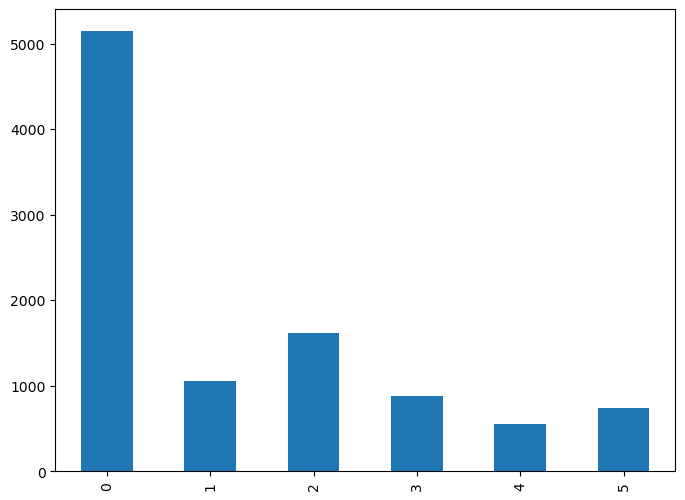

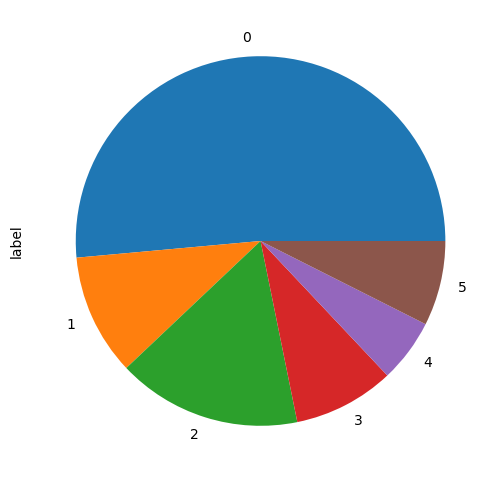

In [29]:
# value_counts():计算train_data中label列中各个取值的频数;sort_index():对结果进行按索引排序
plt.figure(figsize=(8, 6))

train_data['label'].value_counts().sort_index().plot(kind='bar')
plt.show()

plt.figure(figsize=(8, 6))

train_data['label'].value_counts().sort_index().plot(kind='pie')
plt.show()


In [22]:
features = train_data.iloc[:, 1:-1]
features.describe()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature96,feature97,feature98,feature99,feature101,feature102,feature103,feature104,feature105,feature106
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,...,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,1.847411e-17,-9.166001e-17,-3.979039e-17,-7.958079e-17,7.673862e-17,4.654055e-17,6.821210e-17,-4.405365e-17,-6.394885e-18,-6.394885e-18,...,6.110668e-17,3.268497e-17,2.842171e-18,-2.842171e-17,5.329071e-19,-9.379164e-17,-7.460699e-17,6.323830e-17,-5.080381e-17,-5.613288e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.001890e-02,-9.999000e+01,-9.999000e+01,-9.999000e+01,-1.000000e-02,-2.980527e+00,-2.693245e+00,-9.999000e+01,-9.999000e+01,-2.740217e+00,...,-2.789873e-01,-2.751878e+00,-9.999000e+01,-9.998699e+01,-2.812992e+00,-9.999000e+01,-9.999000e+01,-1.000016e-02,-2.763340e+00,-9.999000e+01
25%,-1.001890e-02,1.000000e-02,1.000000e-02,1.000000e-02,-1.000000e-02,-5.093065e-01,-5.251388e-01,1.000000e-02,1.000000e-02,-4.960219e-01,...,-9.973061e-03,-5.254814e-01,1.000000e-02,9.927412e-03,-5.015100e-01,1.000000e-02,9.997469e-03,-1.000011e-02,-5.242451e-01,1.000000e-02
50%,-1.001890e-02,1.000000e-02,1.000000e-02,1.000000e-02,-1.000000e-02,-1.974459e-01,-1.745746e-01,1.000000e-02,1.000000e-02,-9.747509e-02,...,-9.973061e-03,-1.523583e-01,1.000000e-02,9.927412e-03,-9.737752e-02,1.000000e-02,9.997469e-03,-1.000011e-02,-1.454261e-01,1.000000e-02
75%,-1.001890e-02,1.000000e-02,1.000000e-02,1.000000e-02,-1.000000e-02,3.773630e-01,2.330571e-01,1.000000e-02,1.000000e-02,3.158232e-01,...,-9.973061e-03,2.501824e-01,1.000000e-02,9.927412e-03,3.281823e-01,1.000000e-02,9.997469e-03,-1.000011e-02,2.745494e-01,1.000000e-02
max,9.998982e+01,1.000000e-02,1.000000e-02,1.000000e-02,9.999000e+01,1.014217e+01,7.606227e+00,1.000000e-02,1.000000e-02,7.982986e+00,...,9.998964e+01,7.811050e+00,1.000000e-02,7.846969e-01,8.296095e+00,1.000000e-02,3.529931e-02,9.999000e+01,8.016125e+00,1.000140e-02


计算特征的平均值可以帮助了解该特征在整个数据集上的平均水平。这对于了解数据的整体趋势和中心位置非常有用。例如，在预测问题中，你可以观察目标变量在特征的不同平均值范围内的分布情况，从而帮助确定是否需要进行特征缩放或其他预处理操作。

In [23]:
# 分组的平均数据统计

features_labels = pd.concat([features, train_data[['label']]], axis=1)
train_features = pd.concat([train_data[['sample_id']], features], axis=1)
train_label = train_data[['sample_id', 'label']]

label_Summary = features_labels.groupby('label')
label_Summary.mean()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature96,feature97,feature98,feature99,feature101,feature102,feature103,feature104,feature105,feature106
label,,,,,,,,,,,,,,,,,,,,,
0,0.009458,0.01000,-0.00944,-0.00944,0.00944,0.272729,0.090525,0.010000,-0.00944,0.040572,...,0.009467,-0.104359,-0.00944,-0.009361,0.055976,0.010000,-0.009443,0.009440,-0.123459,-0.00944
1,-0.010019,0.01000,0.01000,0.01000,-0.01000,-0.184600,0.096713,-0.084162,0.01000,0.233194,...,-0.009973,0.259971,0.01000,0.009927,0.074473,0.010000,0.009997,-0.010000,0.312521,0.01000
2,-0.010019,0.01000,0.01000,0.01000,-0.01000,-0.368907,-0.051712,0.010000,0.01000,-0.170051,...,-0.009973,0.517864,0.01000,0.009895,-0.066158,-0.051996,0.009997,-0.009999,0.495829,0.01000
3,-0.010019,0.01000,0.01000,0.01000,-0.01000,-0.442370,-0.206845,0.010000,0.01000,-0.095963,...,-0.009973,-0.233995,0.01000,0.009927,-0.115794,0.010000,0.009997,-0.010000,-0.244877,0.01000
4,-0.010019,0.01000,0.01000,0.01000,-0.01000,-0.429008,-0.230878,0.010000,0.01000,-0.075283,...,-0.010459,-0.309239,0.01000,0.009927,-0.115346,0.010000,0.009997,-0.010000,-0.141464,0.01000
5,-0.010019,-0.12459,0.01000,0.01000,-0.01000,0.022743,-0.234460,0.010000,0.01000,-0.074729,...,-0.009973,-0.264349,0.01000,0.009927,-0.126589,0.010000,0.010032,-0.010000,-0.271543,0.01000


相关性矩阵展示了不同特征之间的相关程度。它用于揭示特征之间的线性关系强度和方向。通过观察相关性矩阵，你可以识别出哪些特征之间存在强相关性，进而了解特征之间的依赖关系，或者判断是否存在多重共线性。这对于特征选择、降维技术和模型构建非常有帮助，可以剔除高度相关的特征或者进行特征组合。

In [24]:
# 相关性矩阵
corr = features.corr()
print(corr)

            feature0  feature1  feature2  feature3  feature4  feature5  \
feature0    1.000000  0.000100  0.000100  0.000100 -0.000100 -0.000500   
feature1    0.000100  1.000000 -0.000100 -0.000100  0.000100 -0.005022   
feature2    0.000100 -0.000100  1.000000 -0.000100  0.000100 -0.003715   
feature3    0.000100 -0.000100 -0.000100  1.000000  0.000100 -0.011285   
feature4   -0.000100  0.000100  0.000100  0.000100  1.000000  0.001565   
...              ...       ...       ...       ...       ...       ...   
feature102  0.000100 -0.000100 -0.000100 -0.000100  0.000100  0.002794   
feature103  0.000100 -0.000353 -0.000100 -0.000100  0.000100 -0.001102   
feature104 -0.000100  0.000100  0.000100  0.000100 -0.000100 -0.004812   
feature105 -0.005515  0.002447  0.001132  0.009976 -0.002363  0.139897   
feature106  0.000100 -0.000100 -0.000100 -0.000100  0.000100  0.000238   

            feature6  feature7  feature8  feature9  ...  feature96  feature97  \
feature0   -0.001832  0.000100

C:\Users\17388\AppData\Local\Temp\ipykernel_44112\1288300895.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train_data.loc[(train_data['label'] == 0), name], color='b', shade=True, label='0')
C:\Users\17388\AppData\Local\Temp\ipykernel_44112\1288300895.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train_data.loc[(train_data['label'] == 1), name], color='r', shade=True, label='1')
C:\Users\17388\AppData\Local\Temp\ipykernel_44112\1288300895.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train_data.loc[(train_data['label'] == 2), name], color='g', shade=True, label='2')
C:\Users\17388\AppData

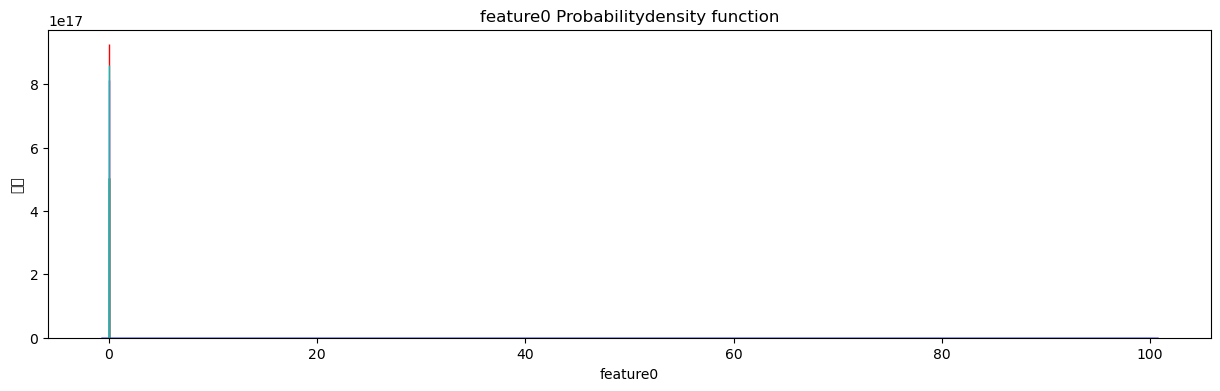

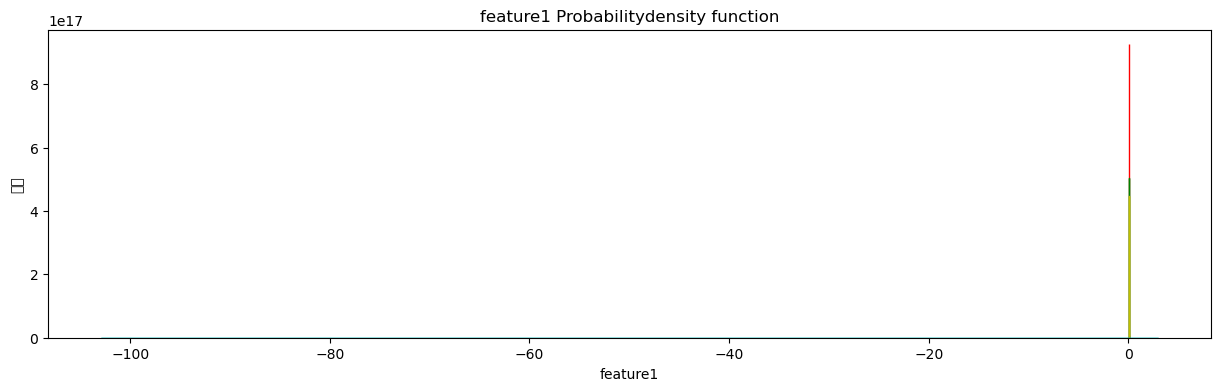

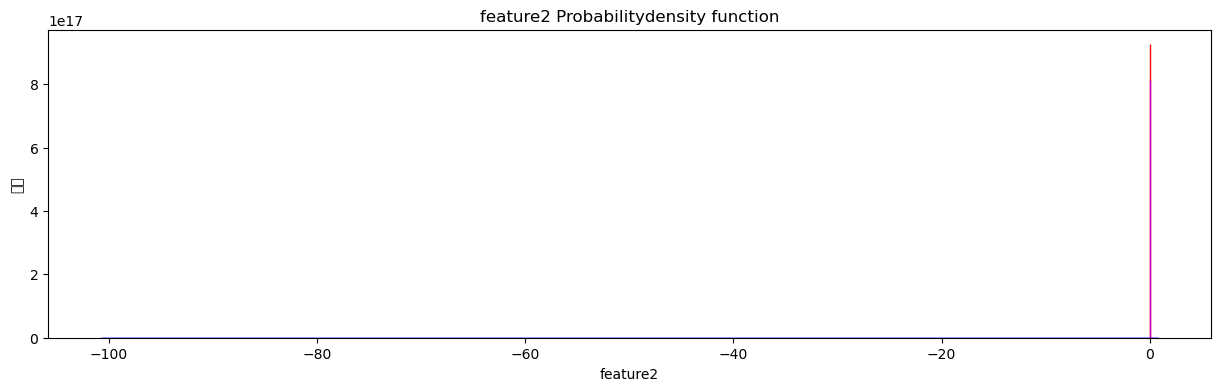

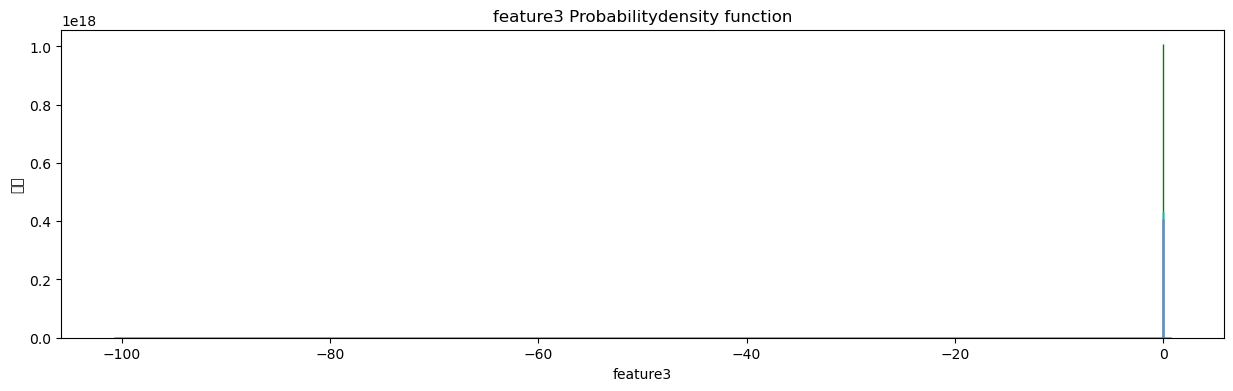

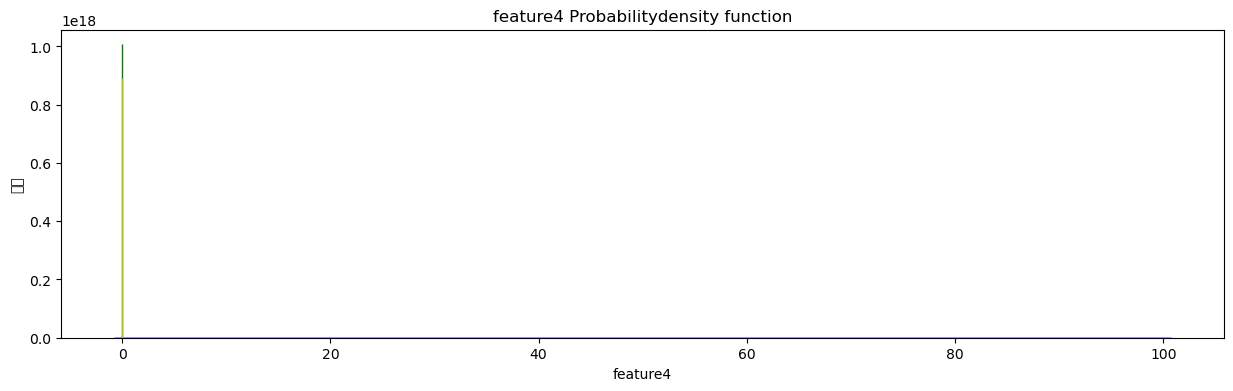

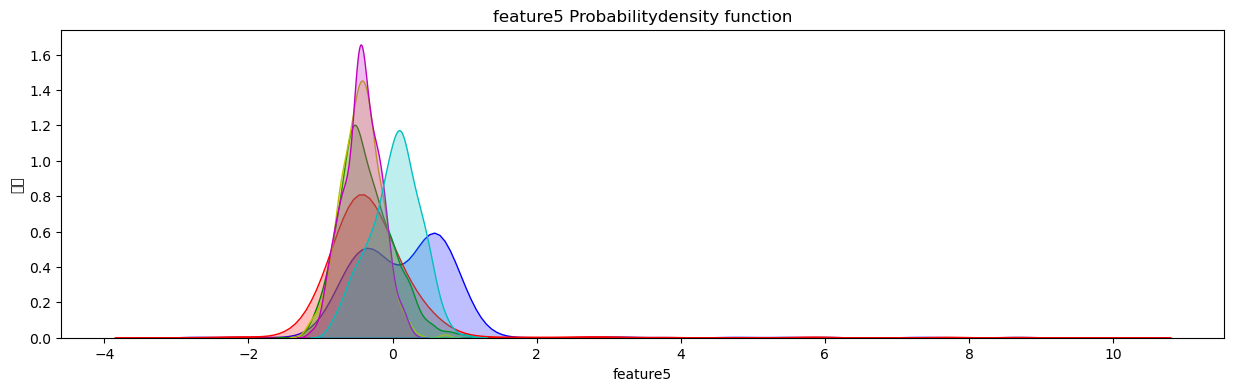

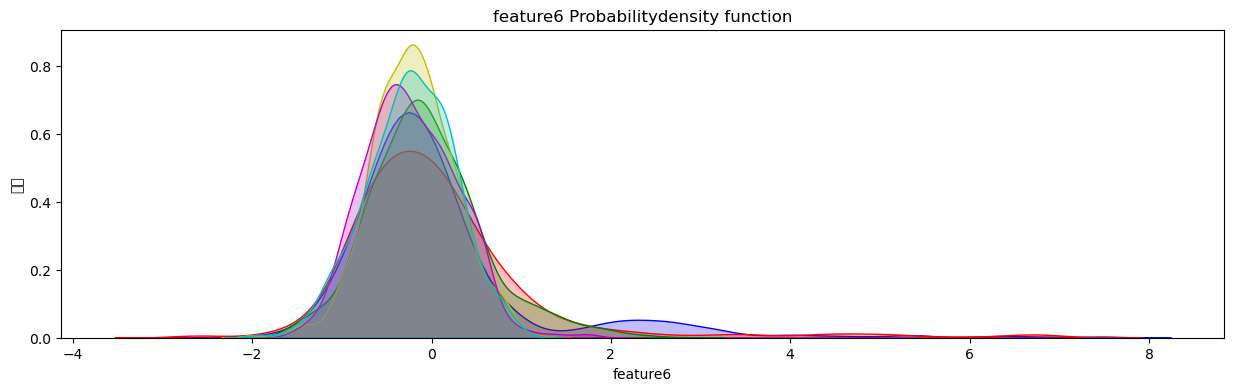

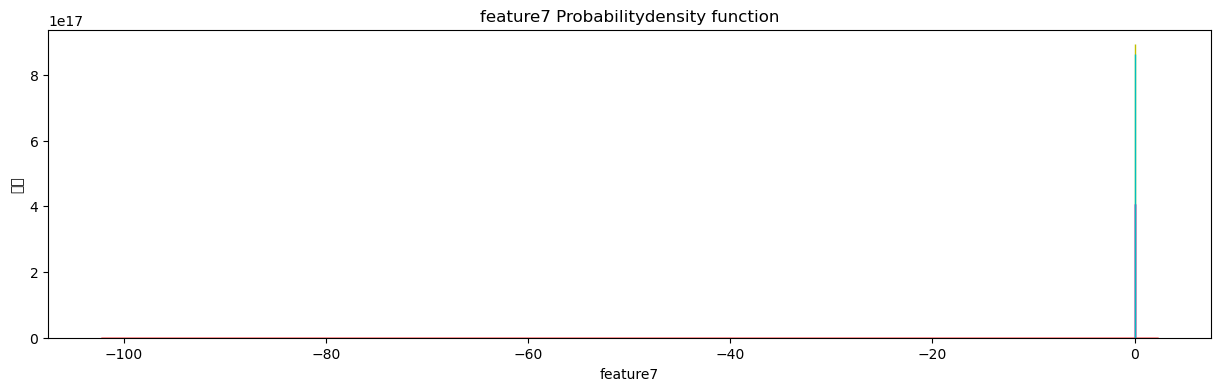

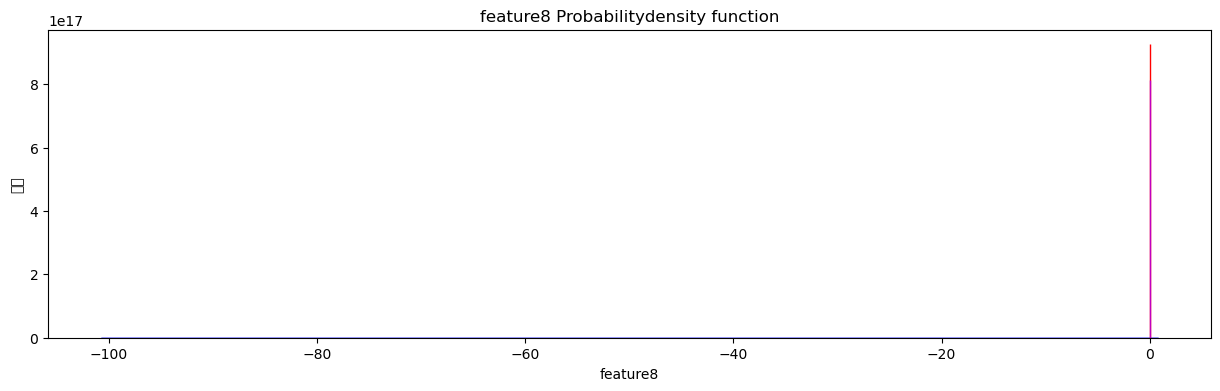

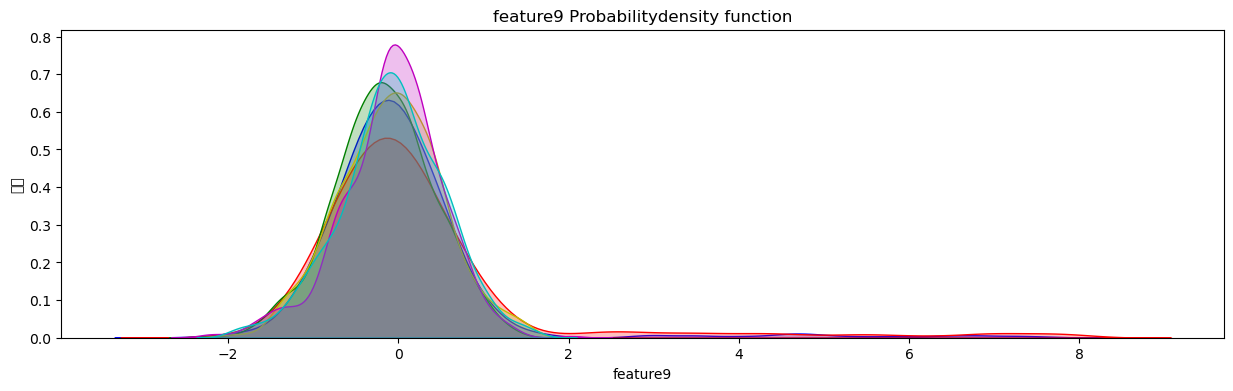

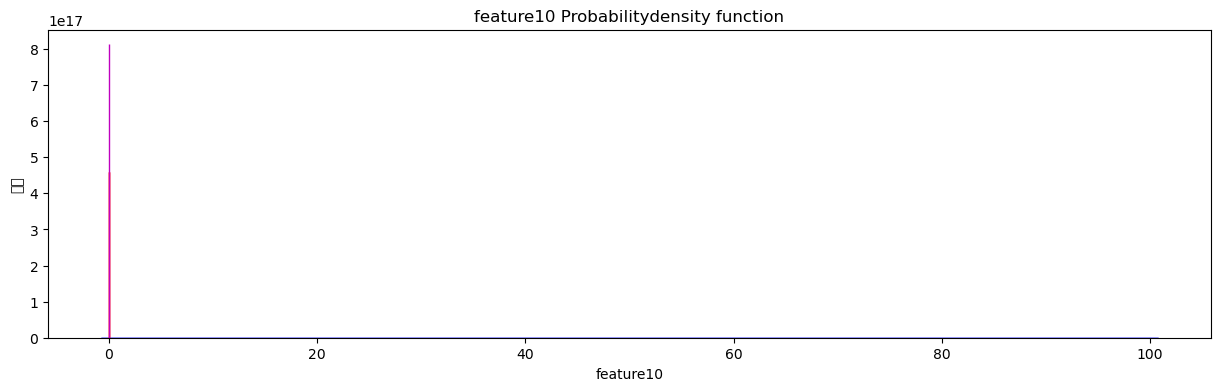

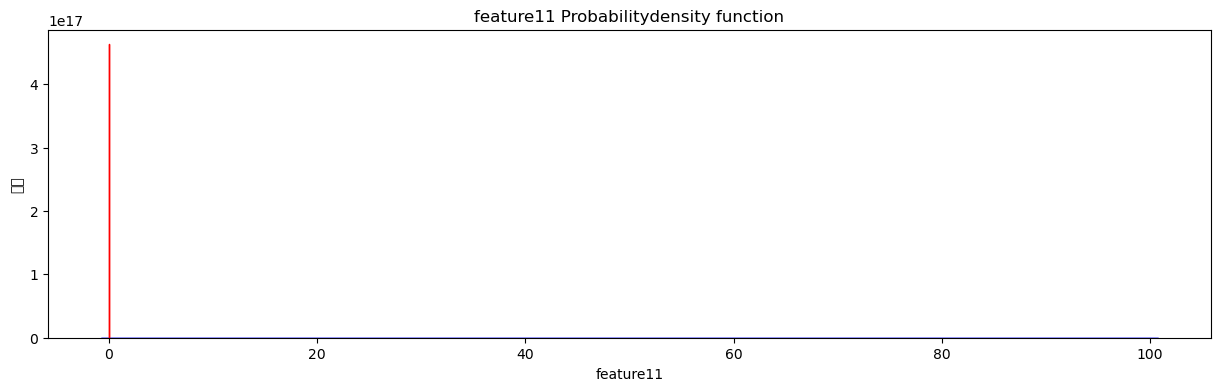

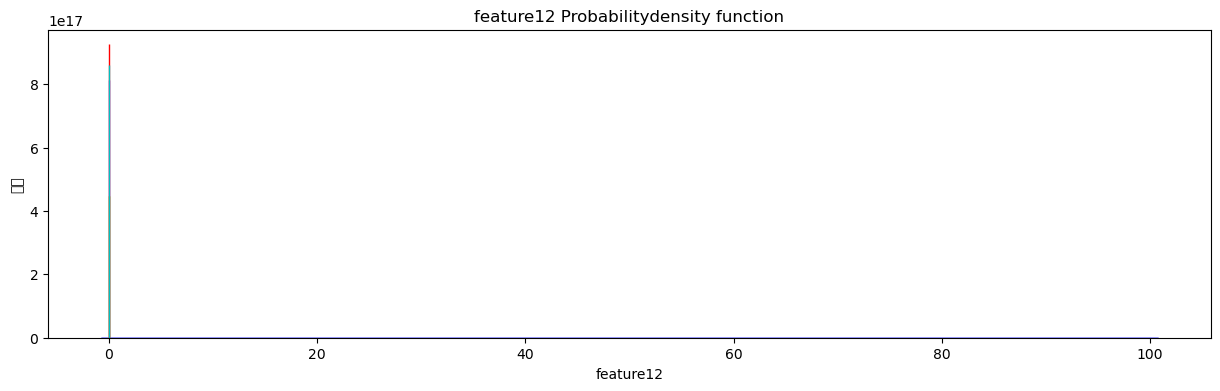

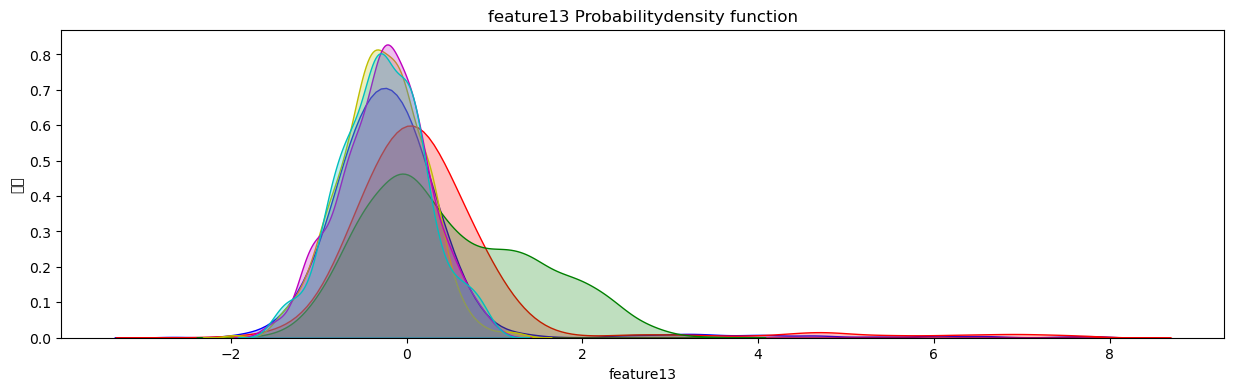

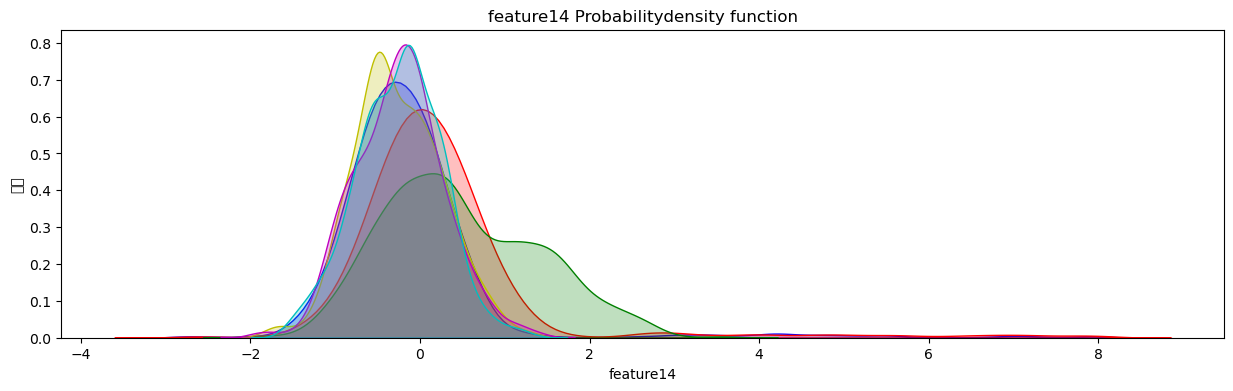

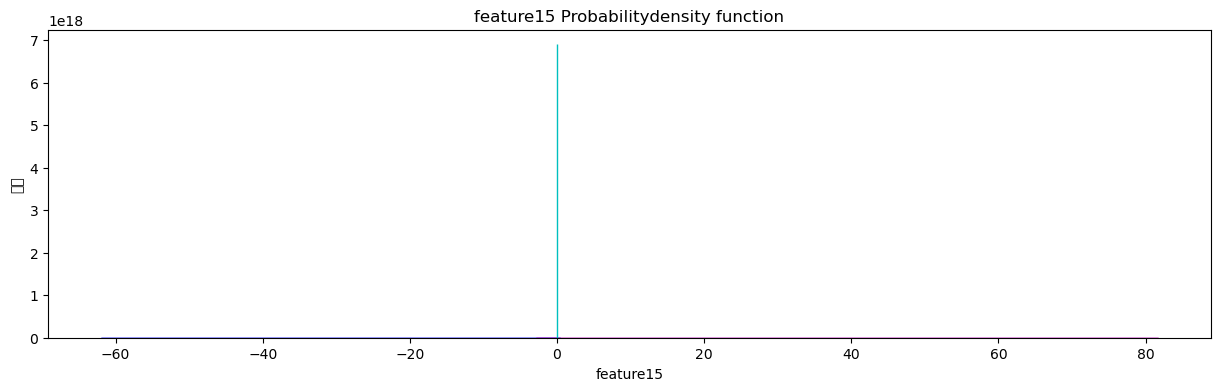

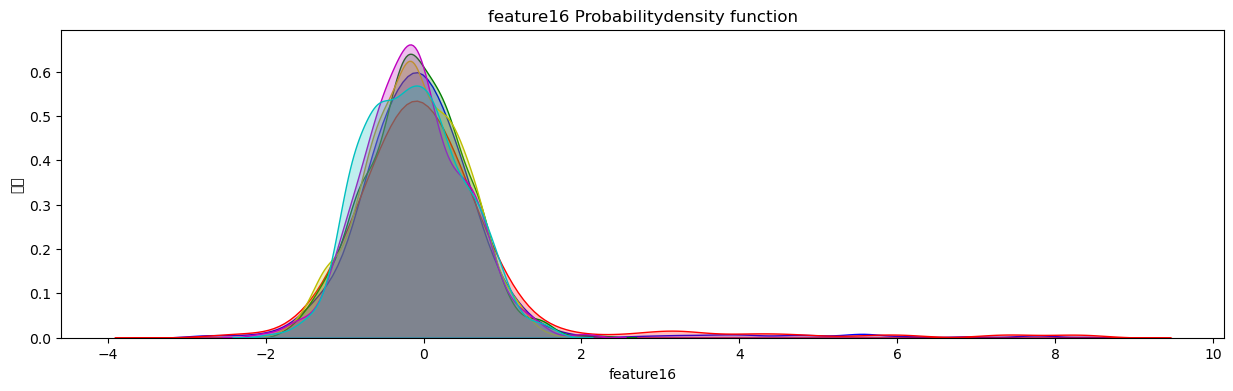

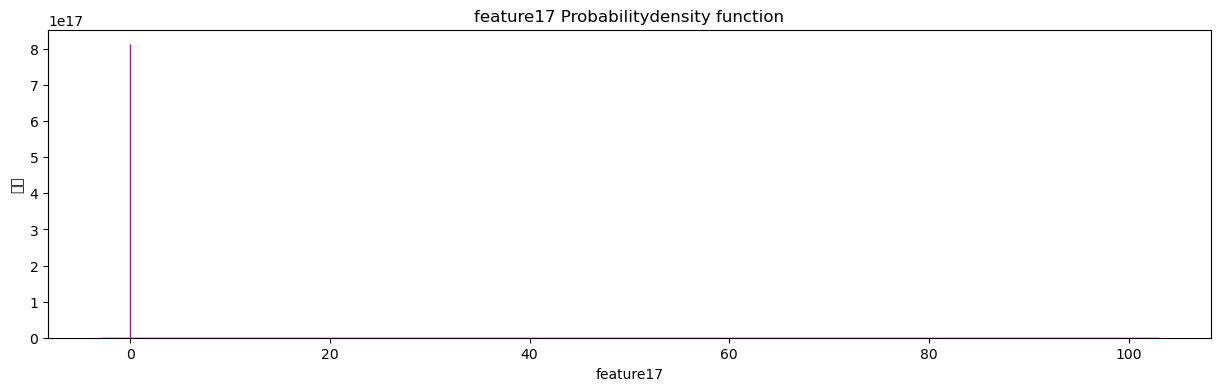

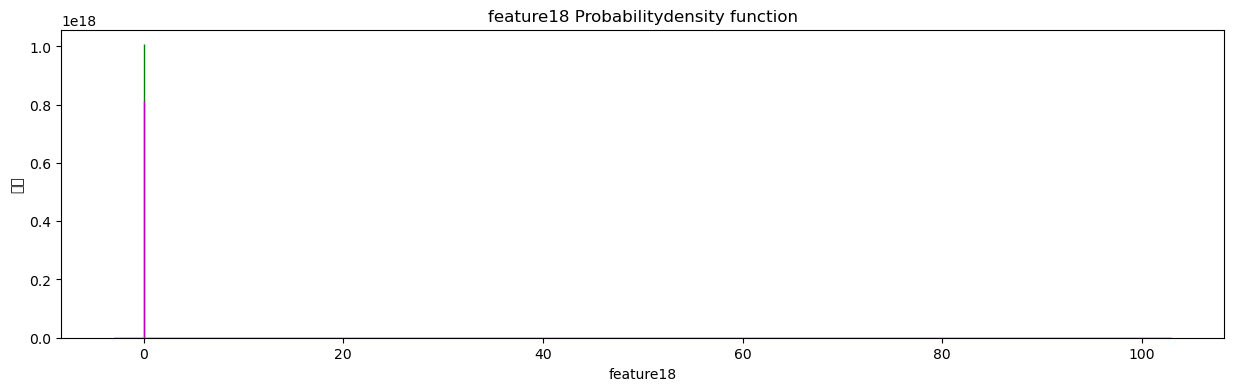

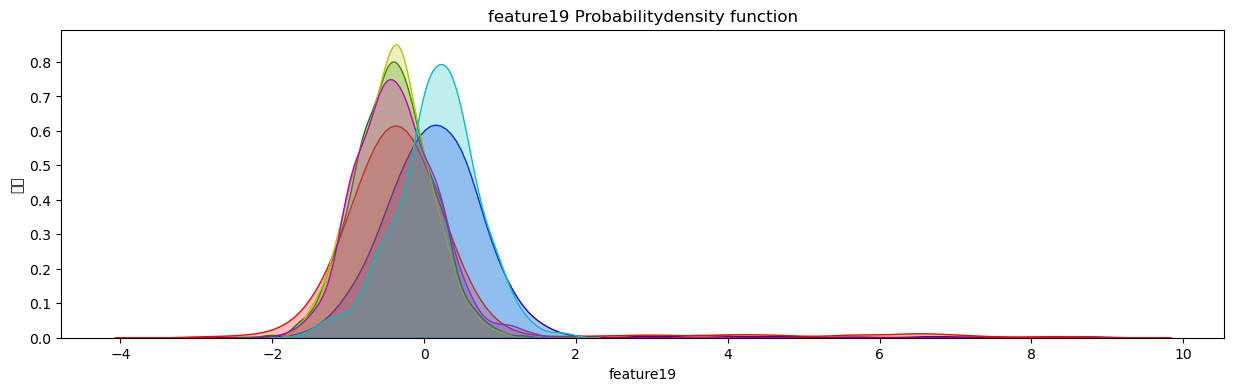

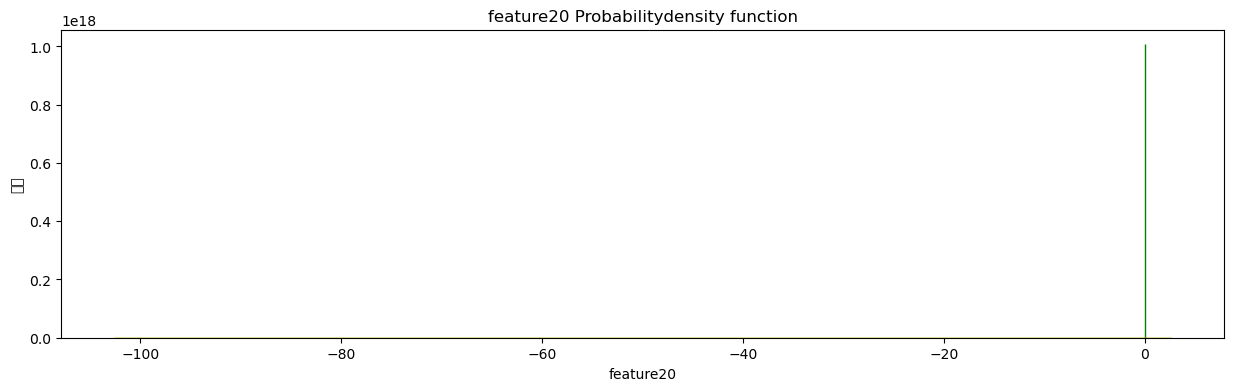

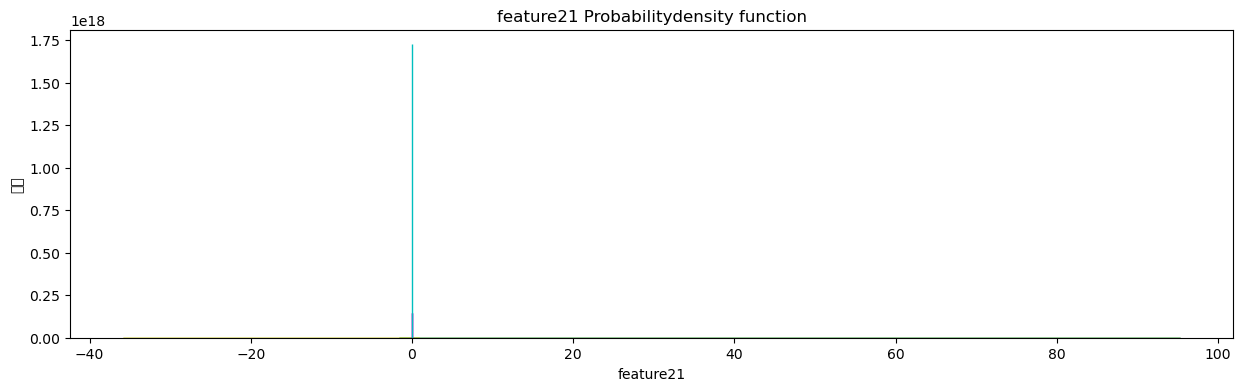

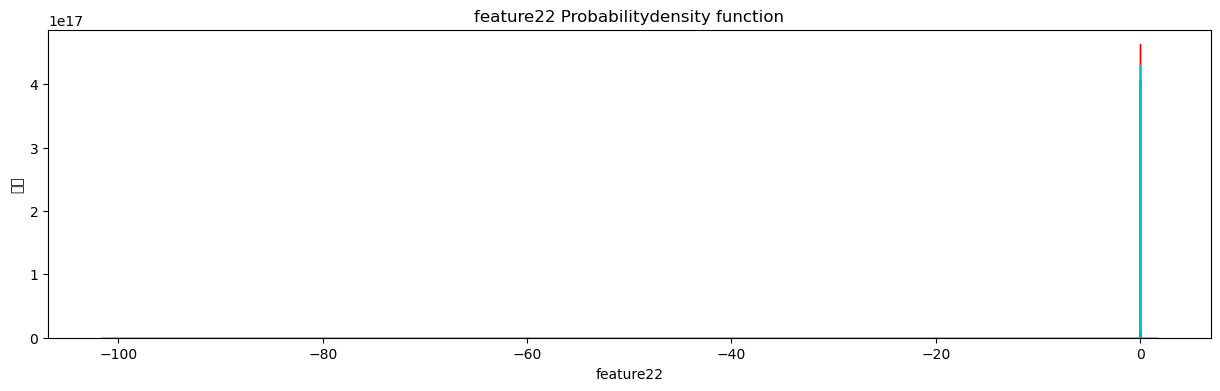

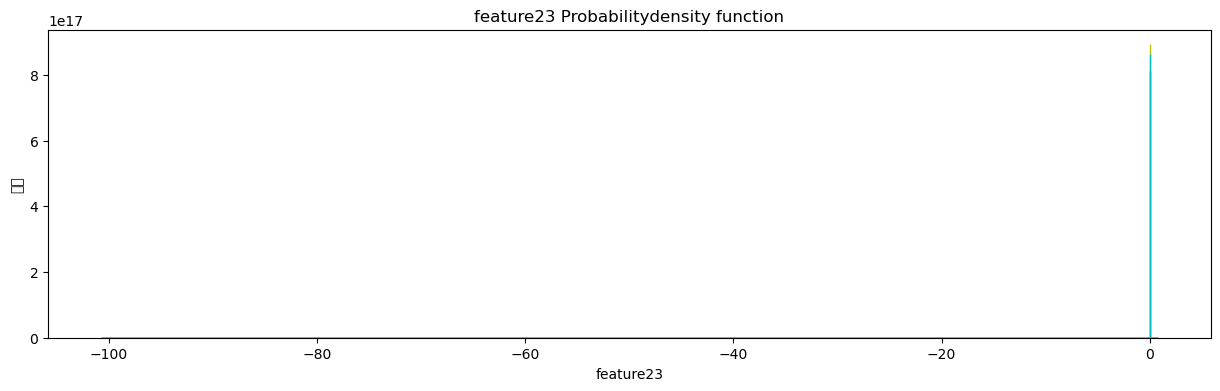

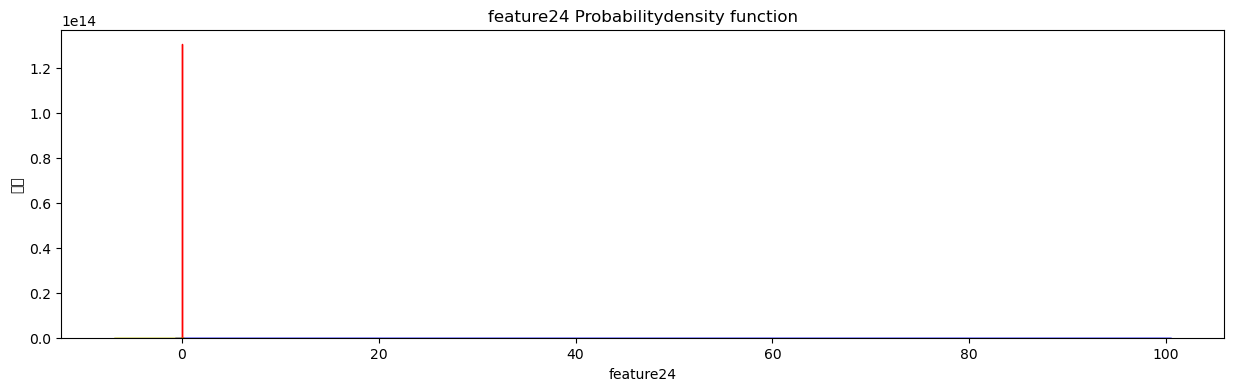

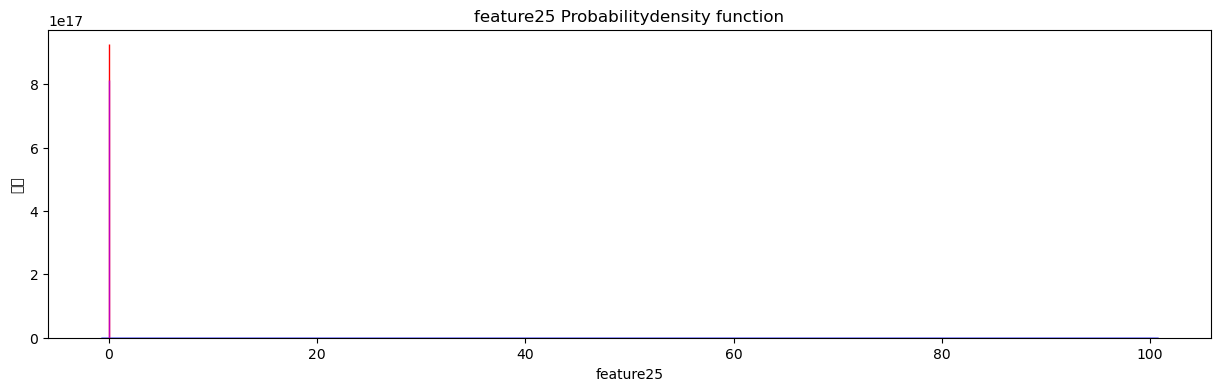

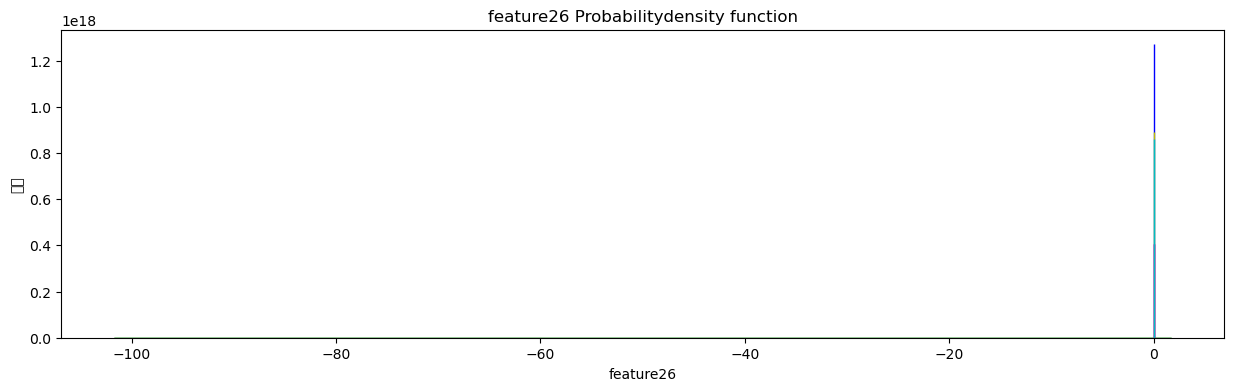

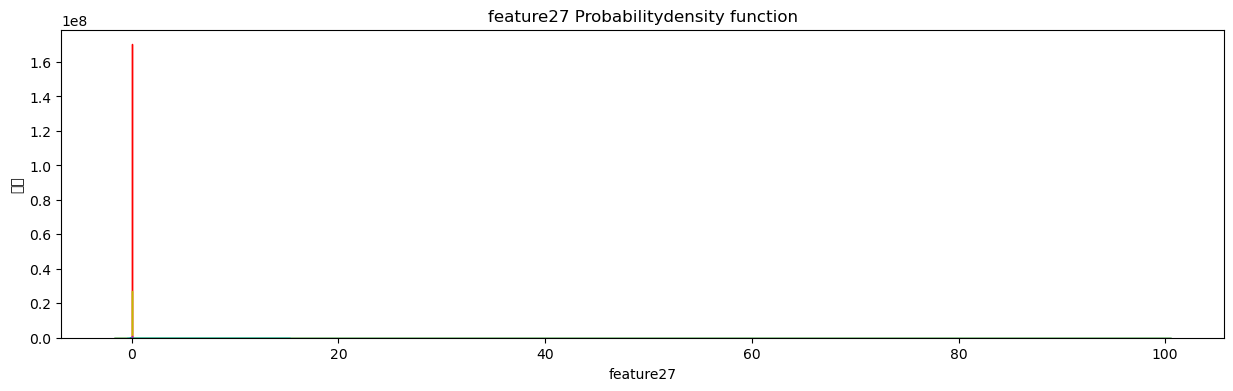

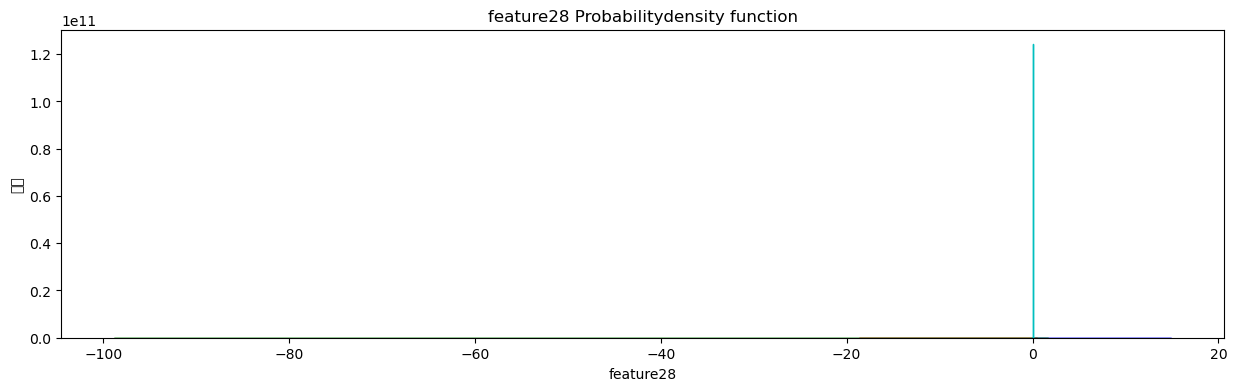

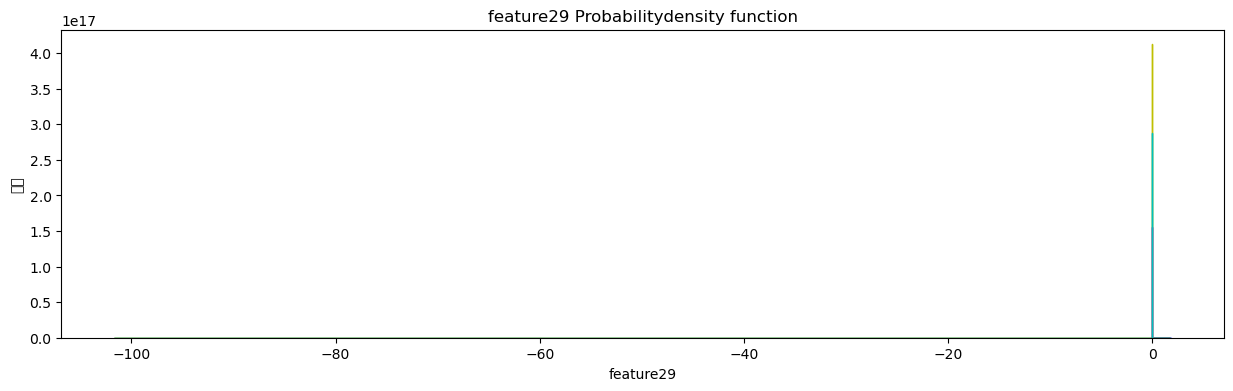

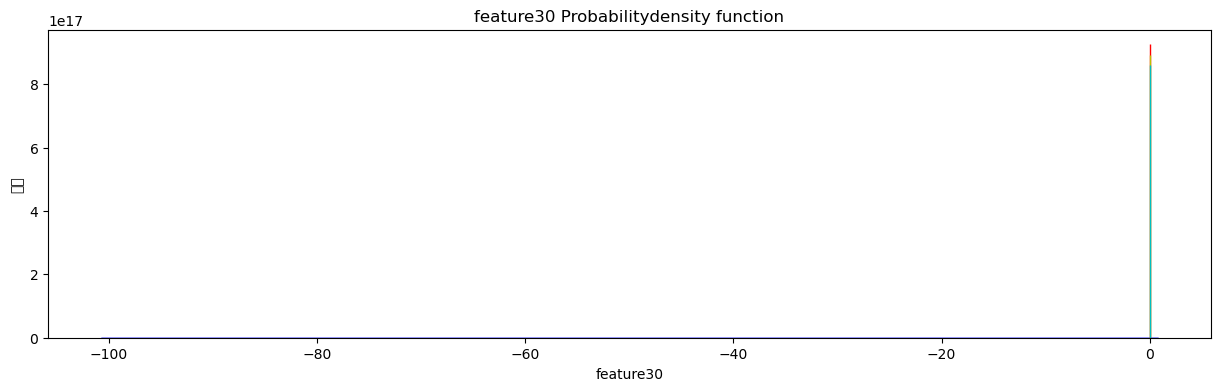

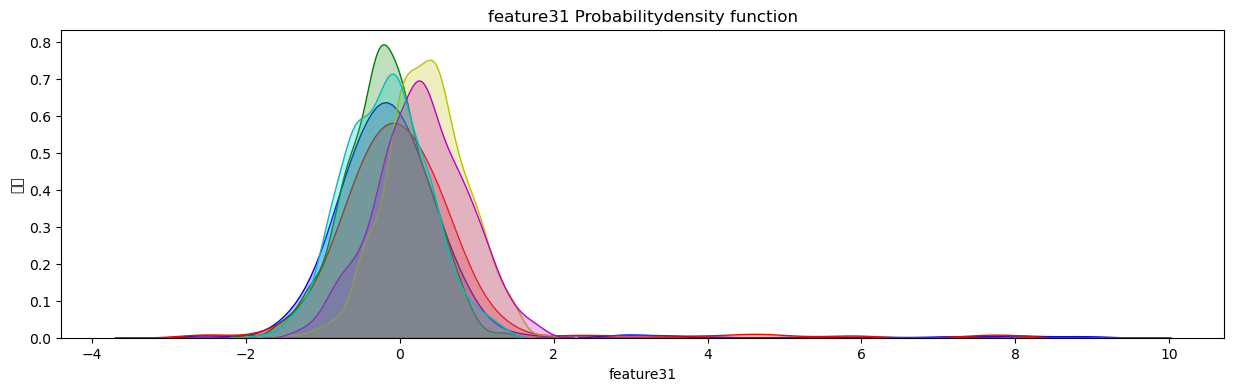

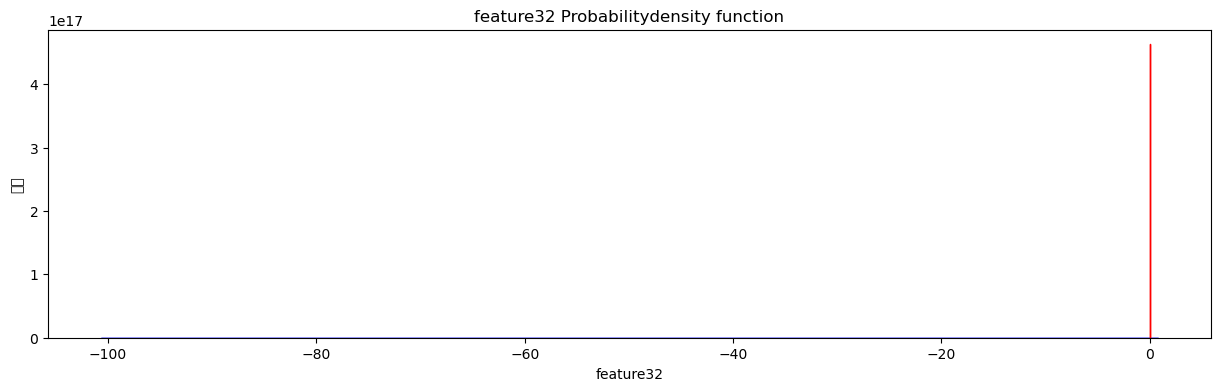

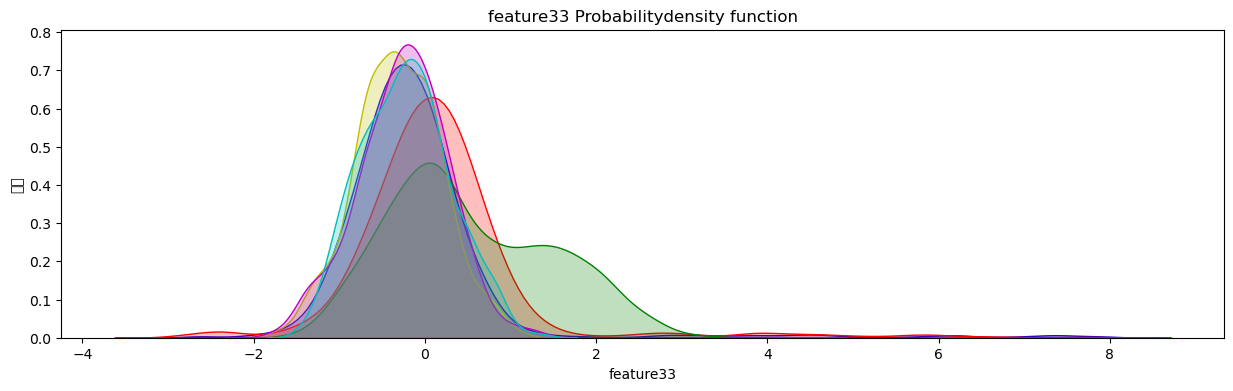

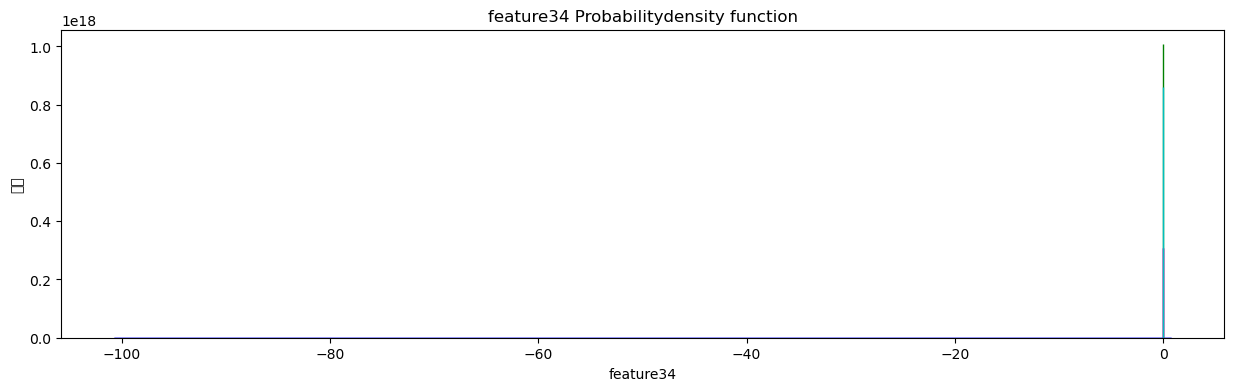

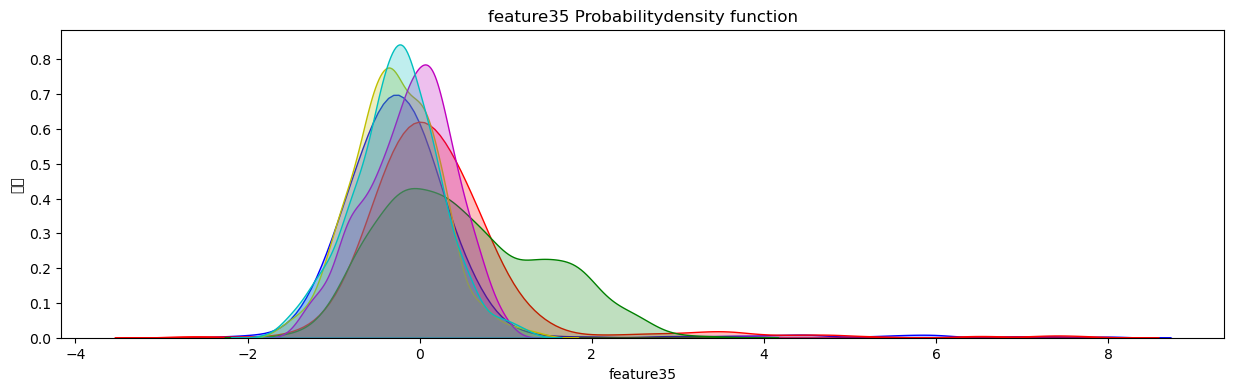

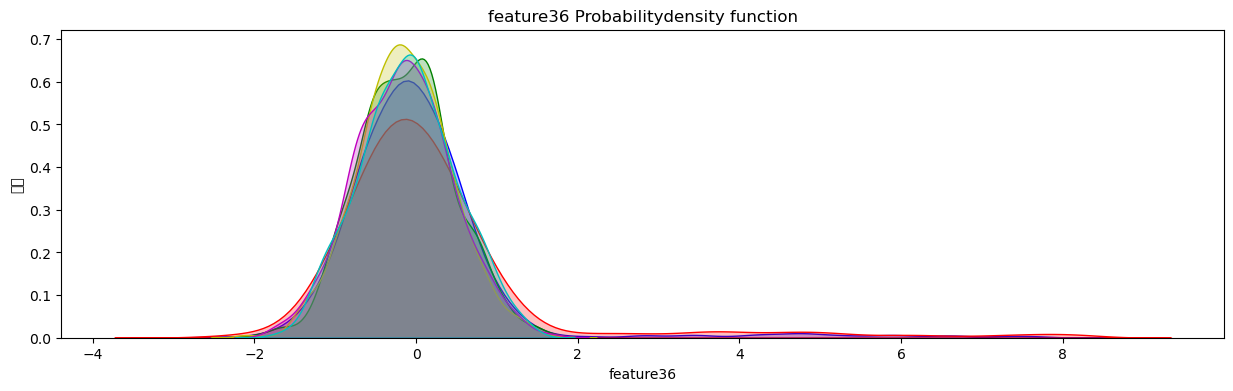

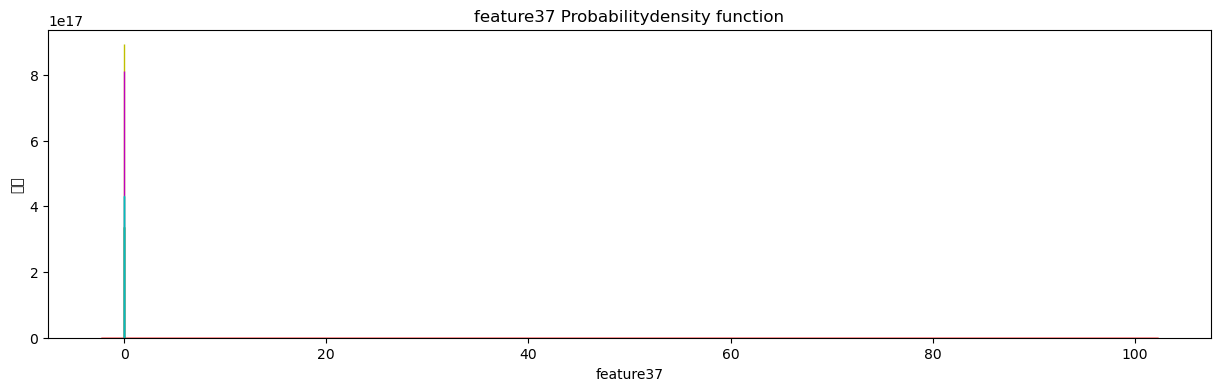

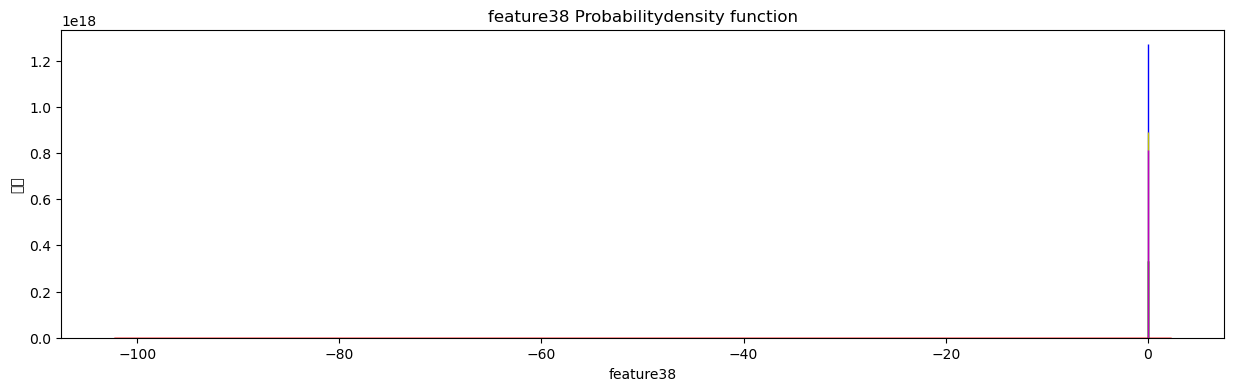

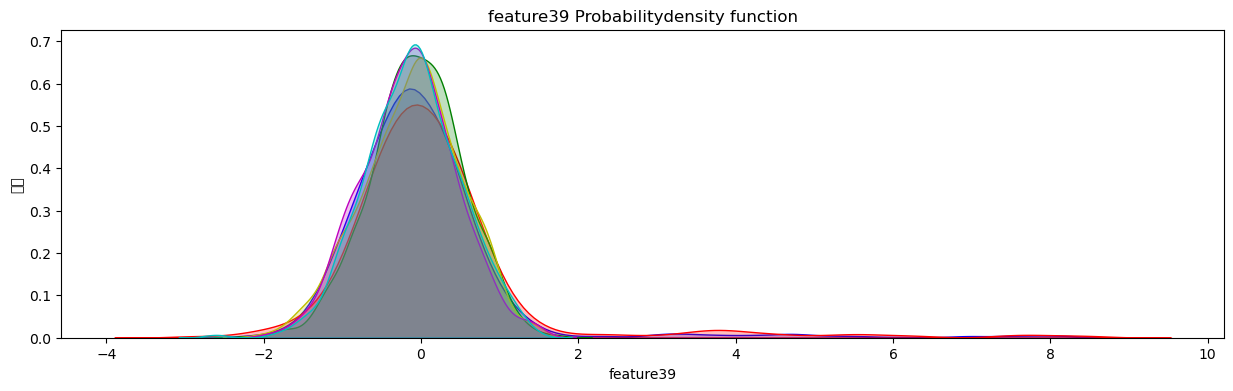

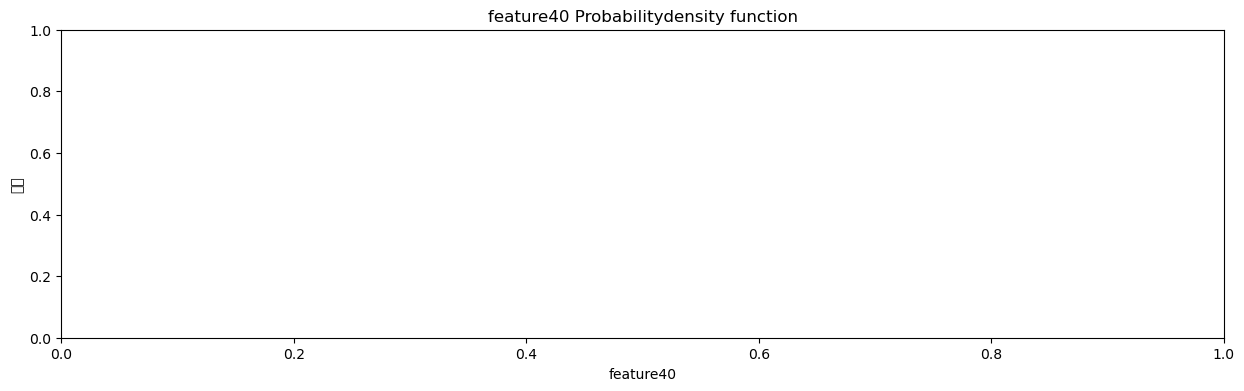

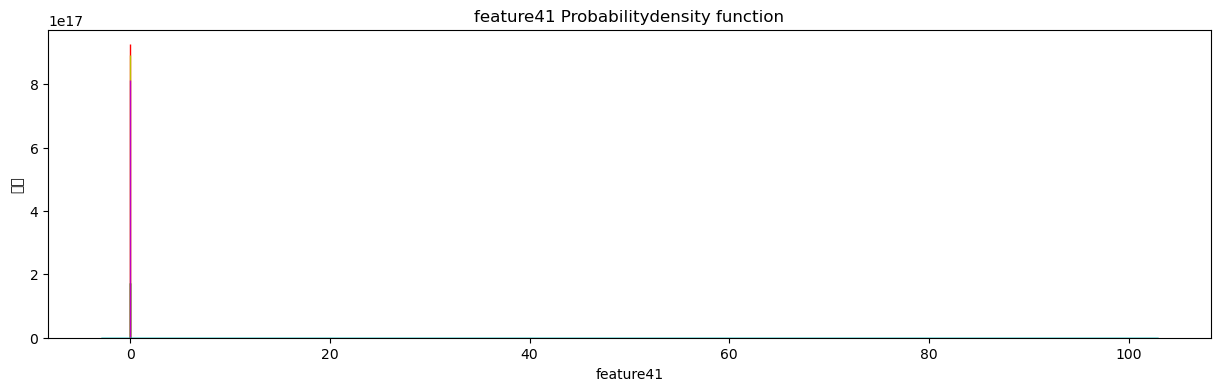

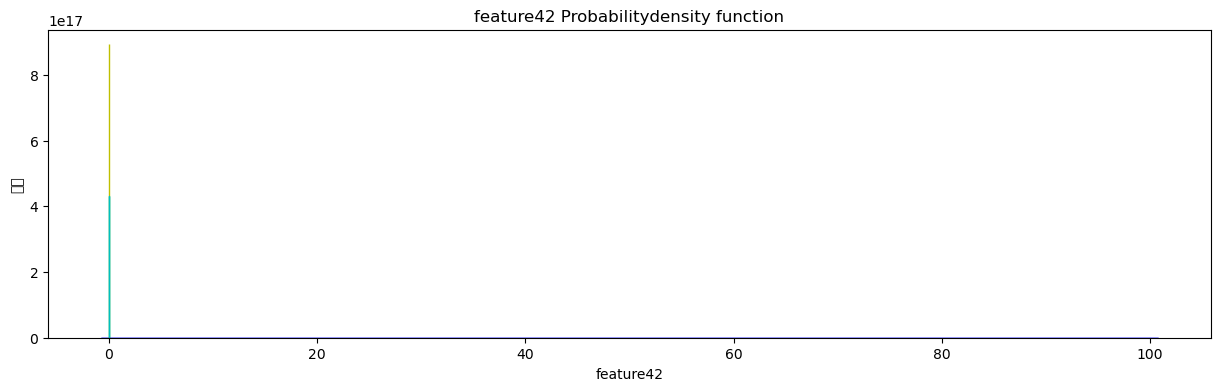

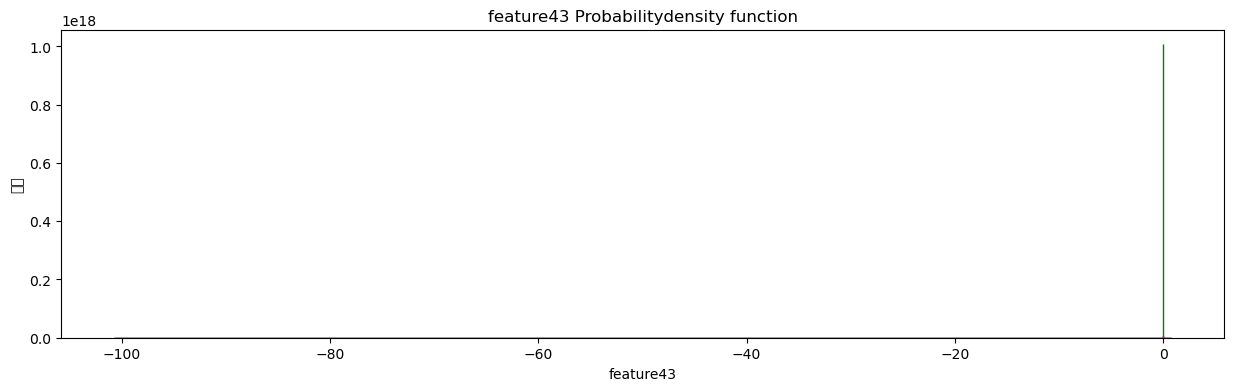

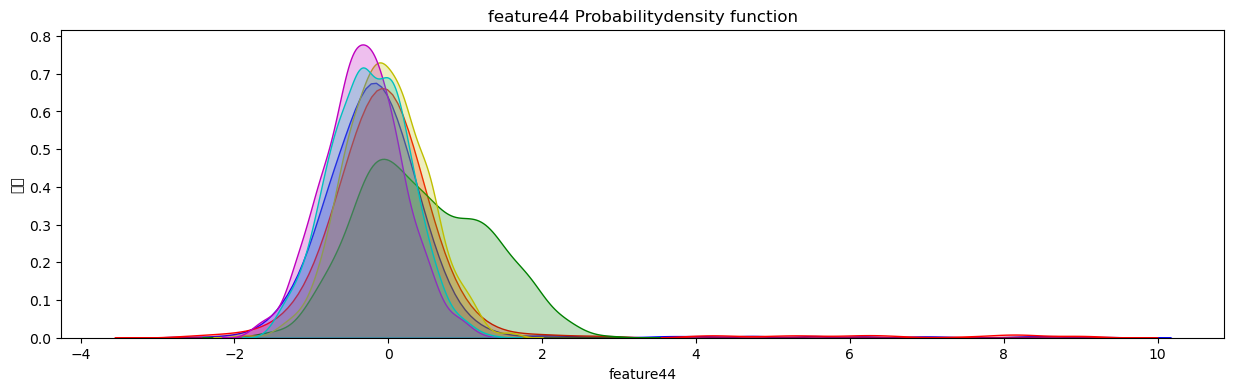

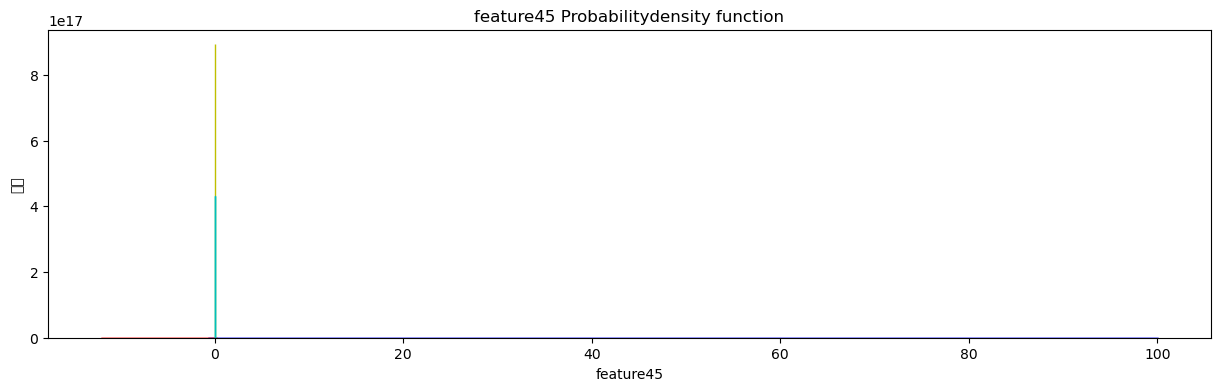

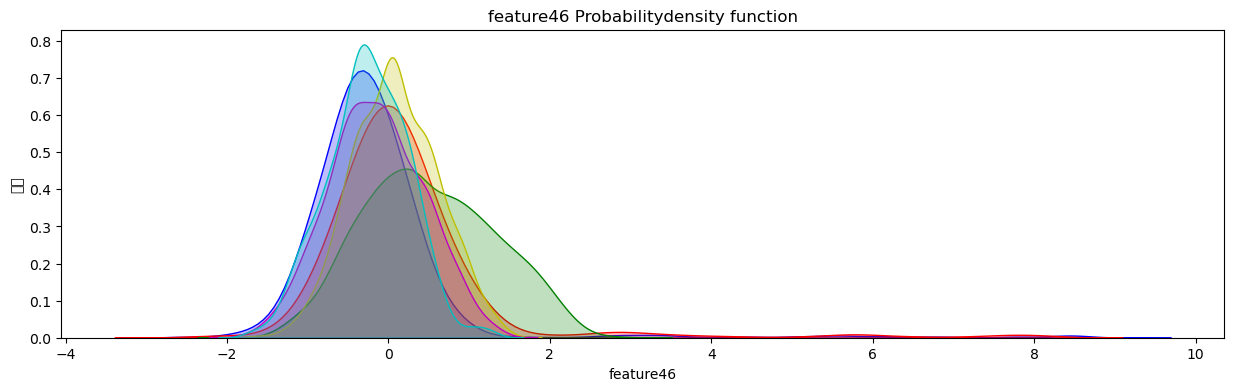

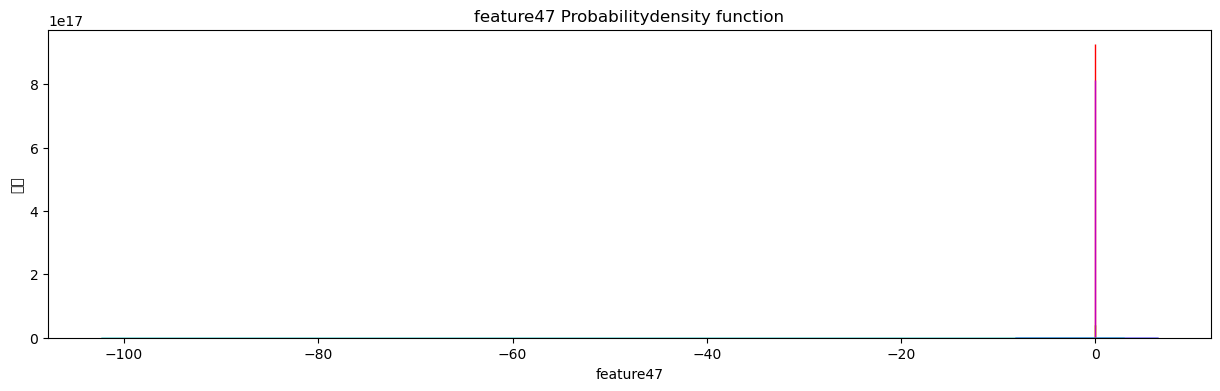

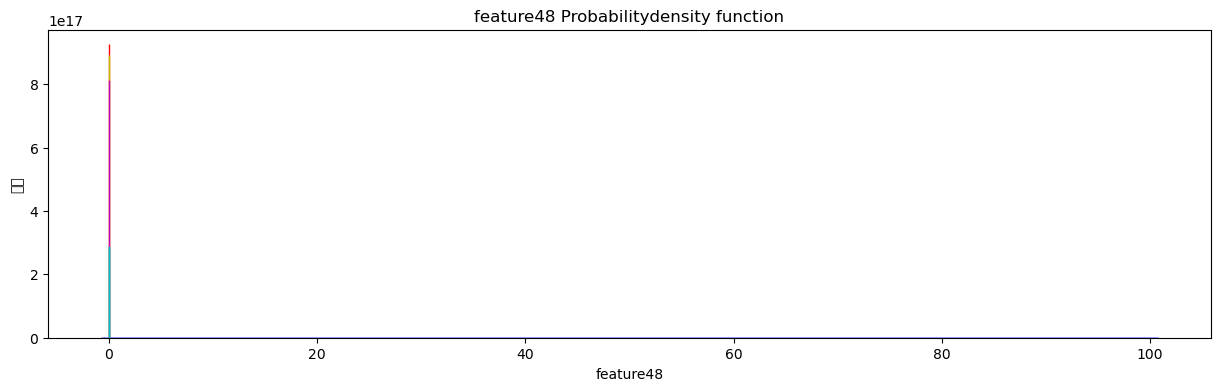

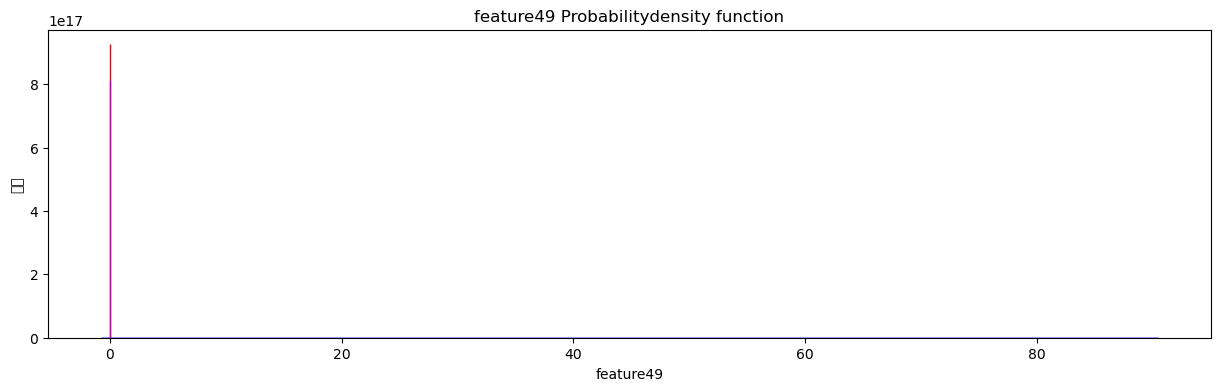

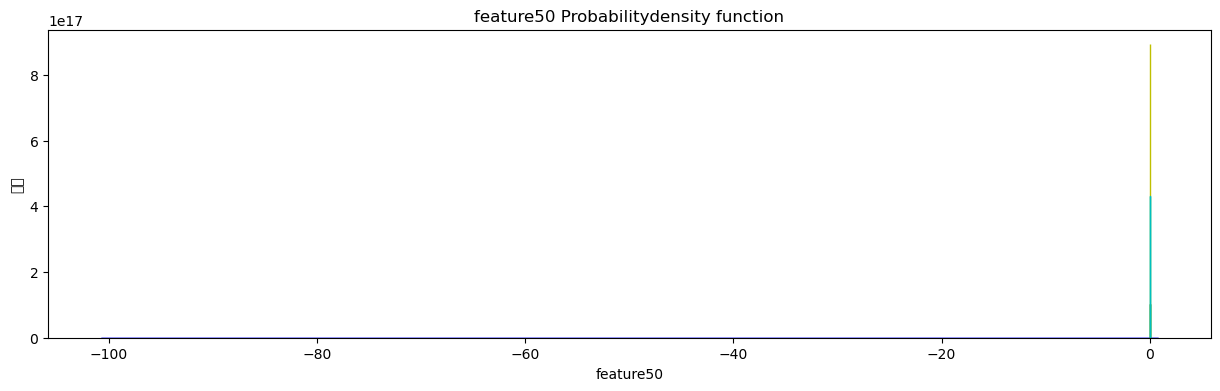

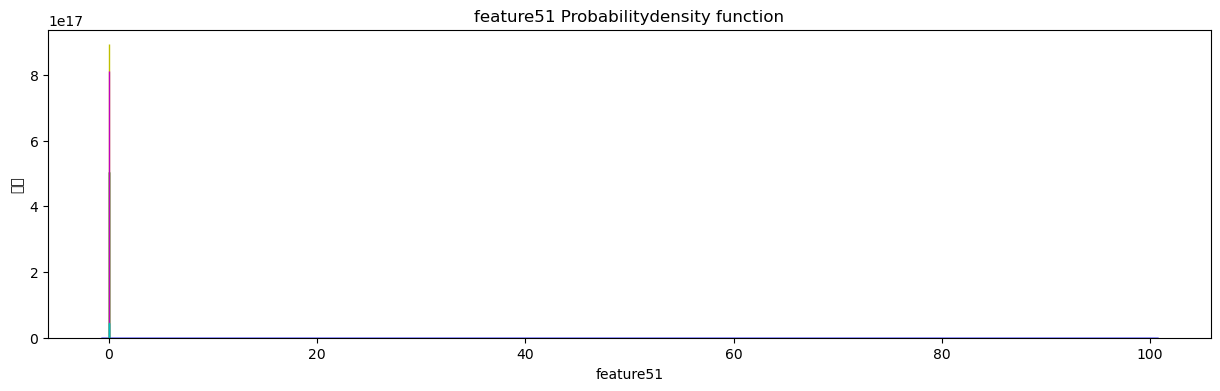

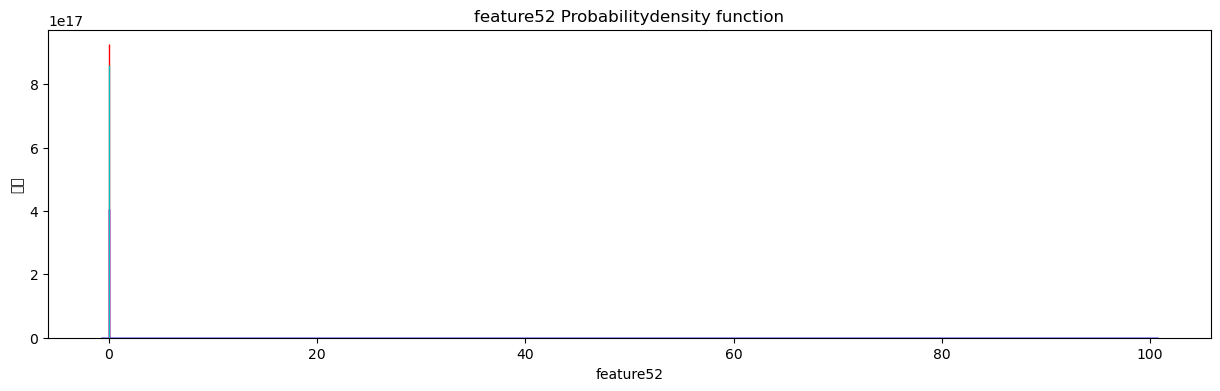

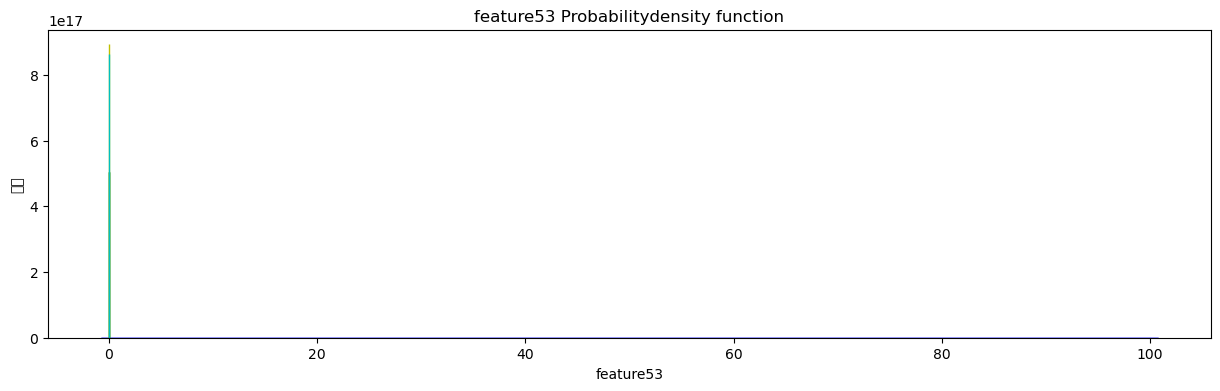

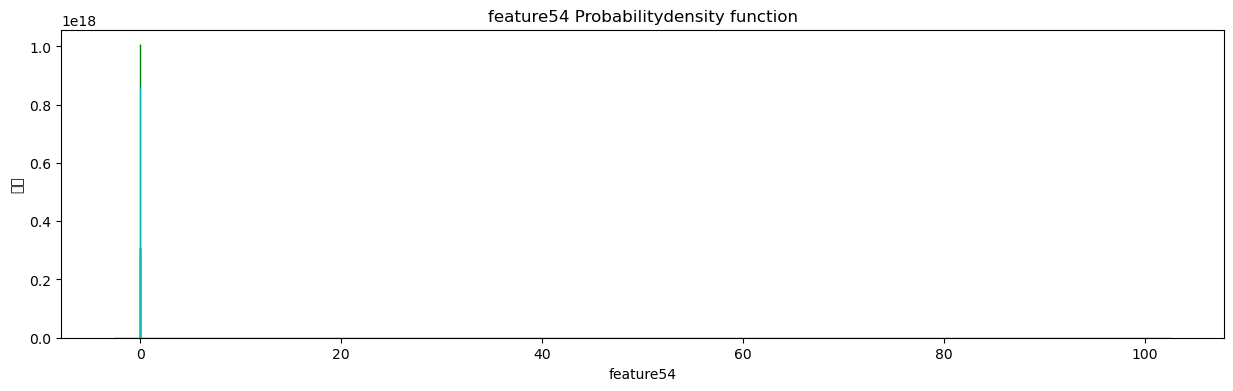

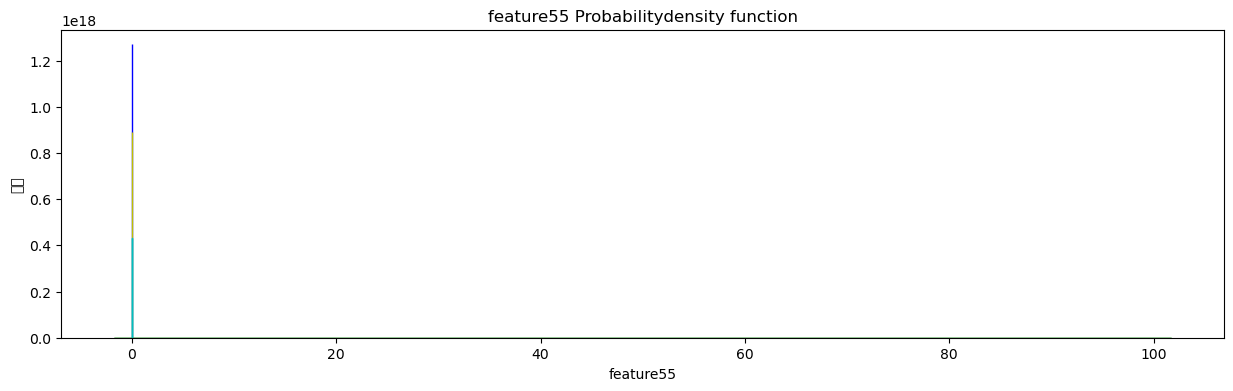

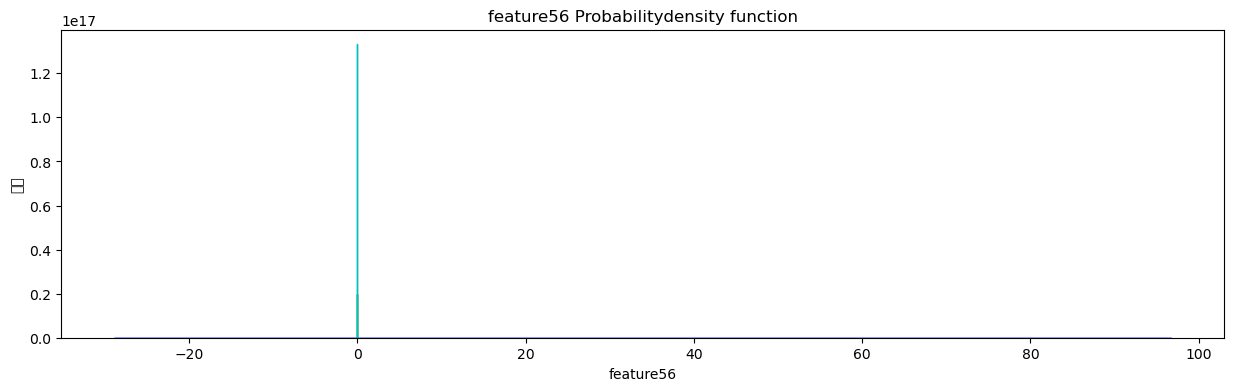

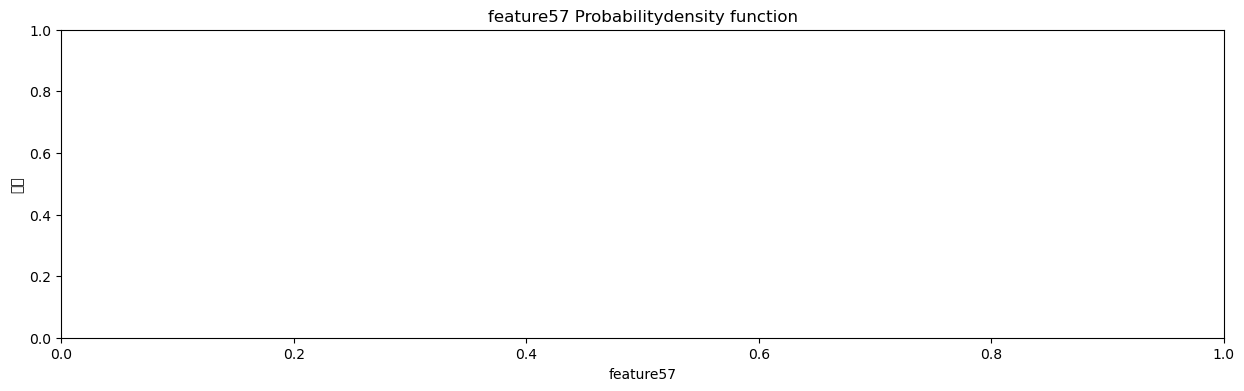

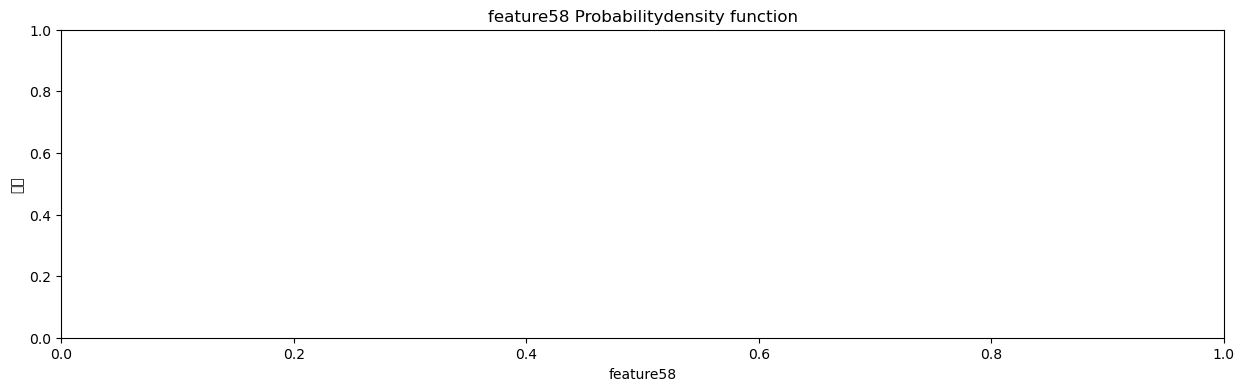

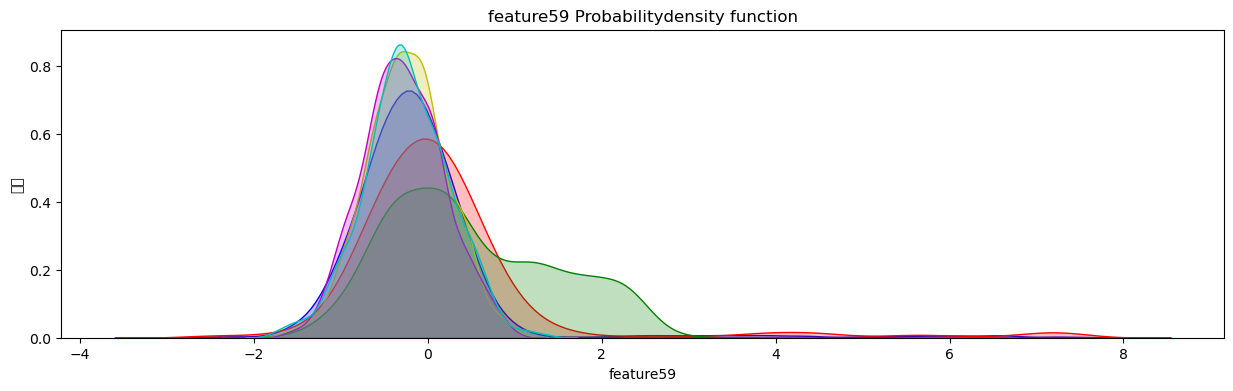

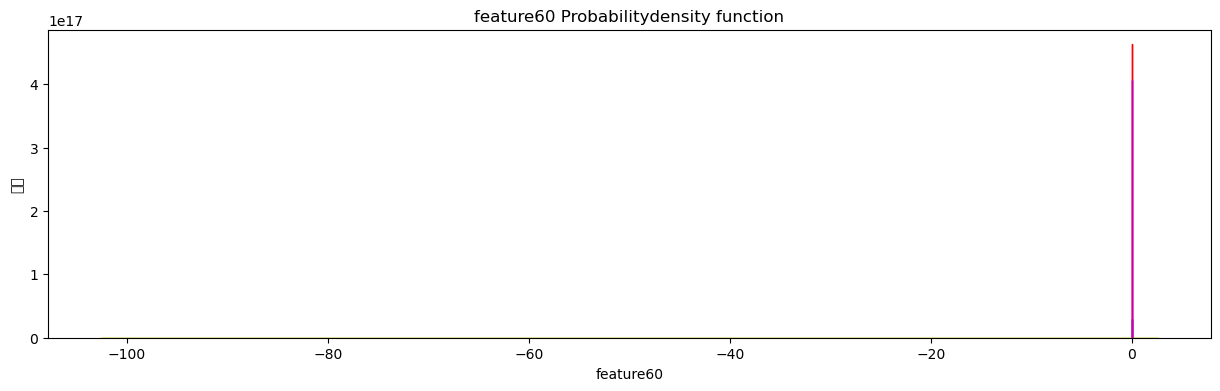

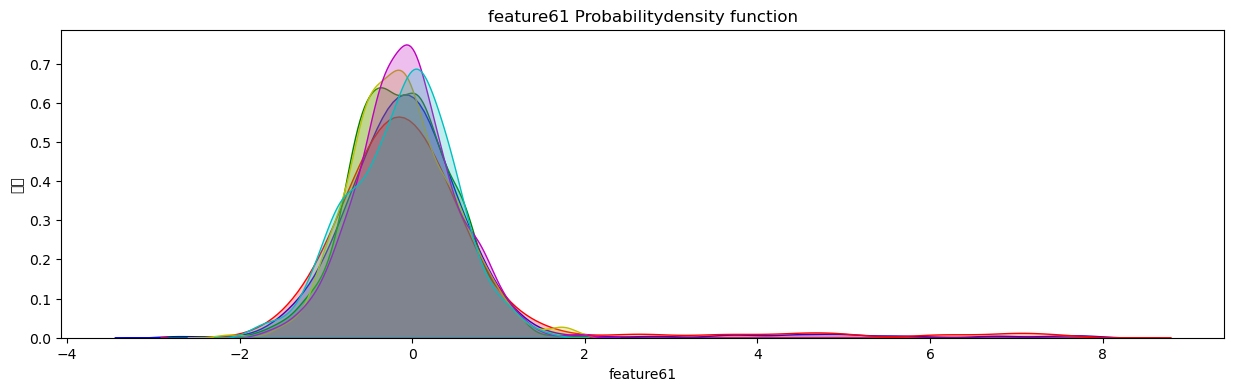

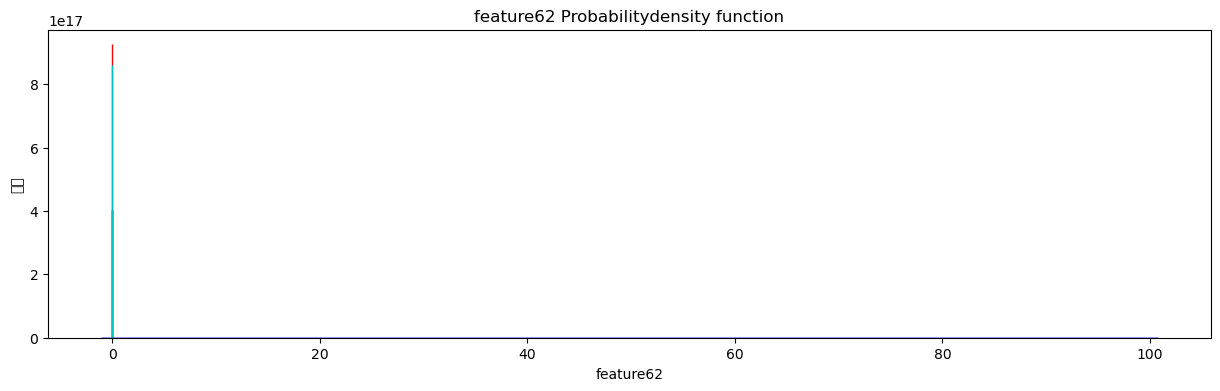

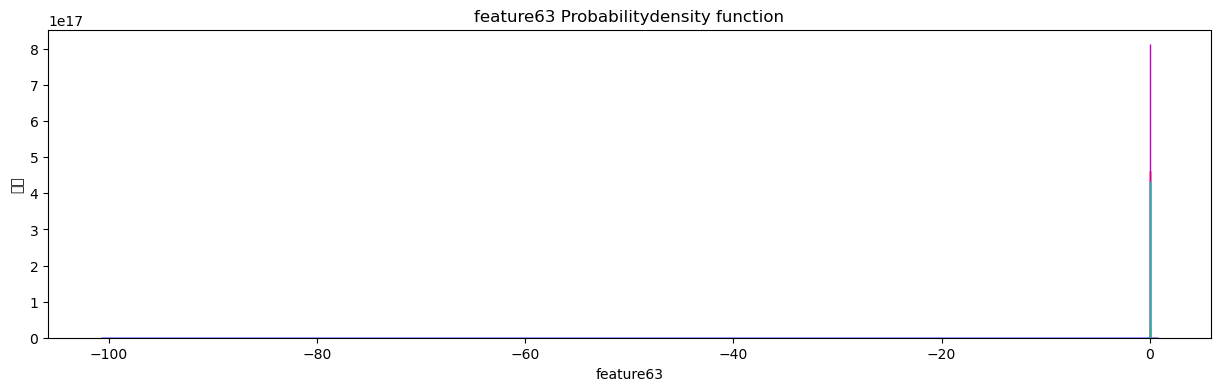

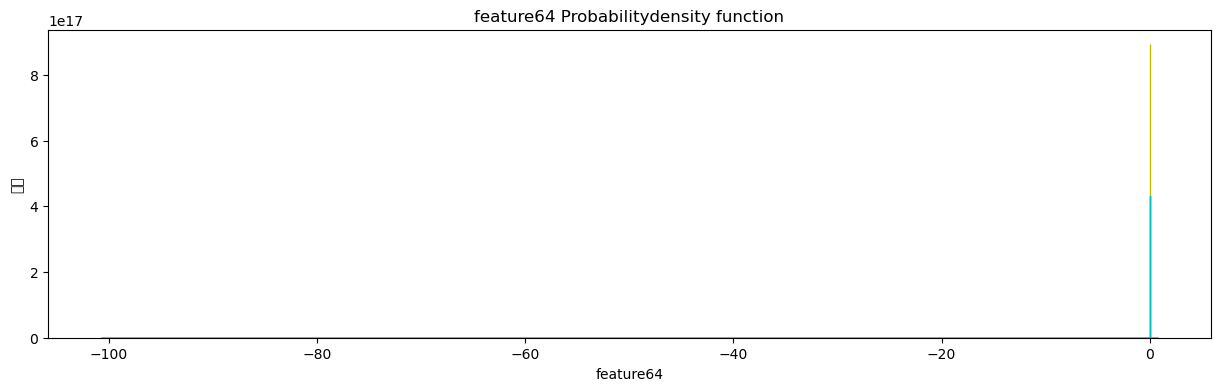

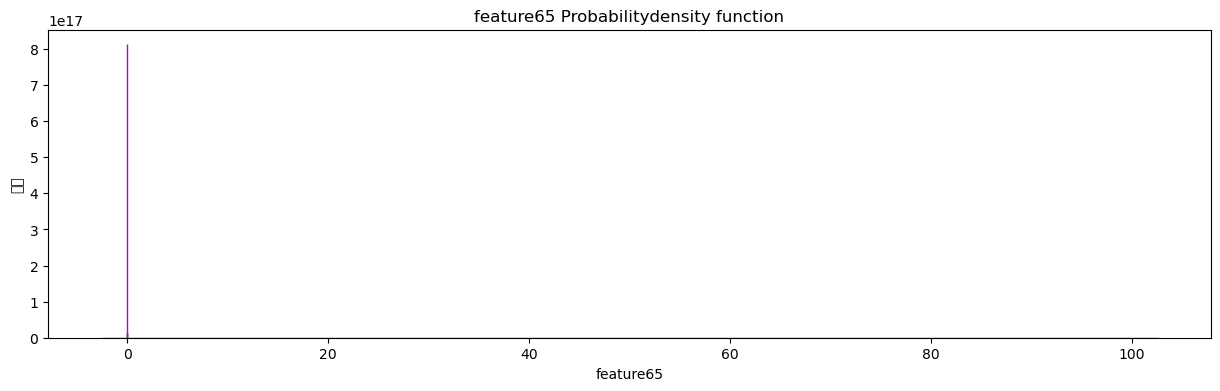

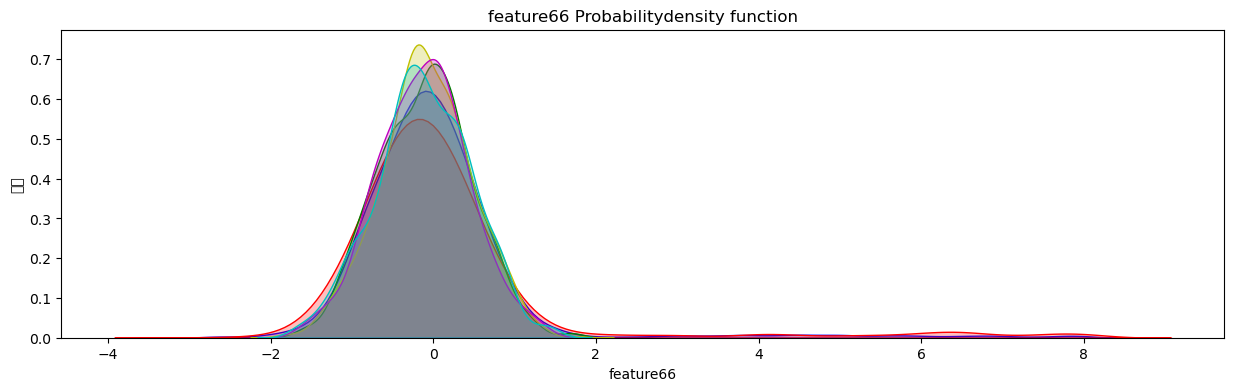

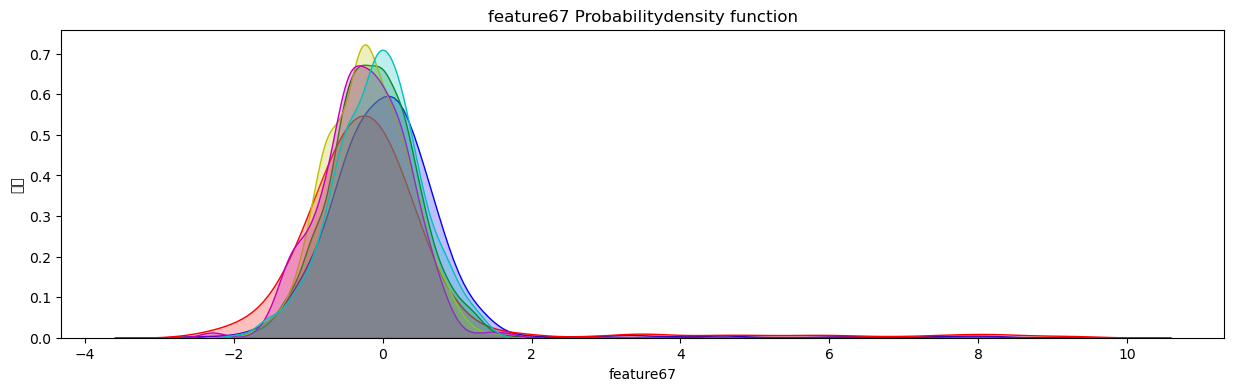

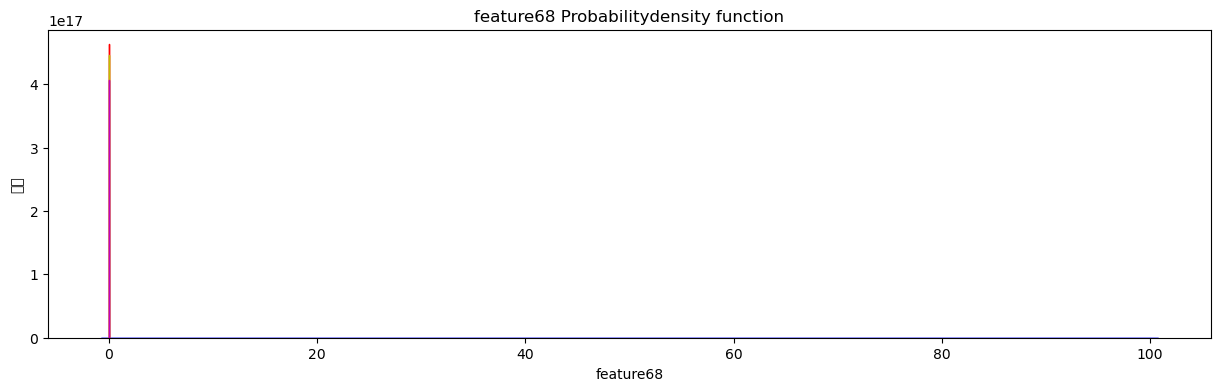

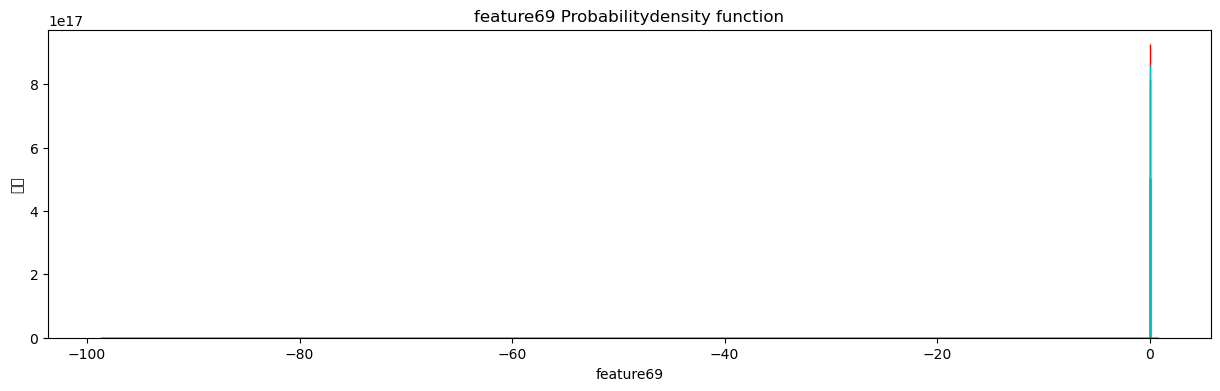

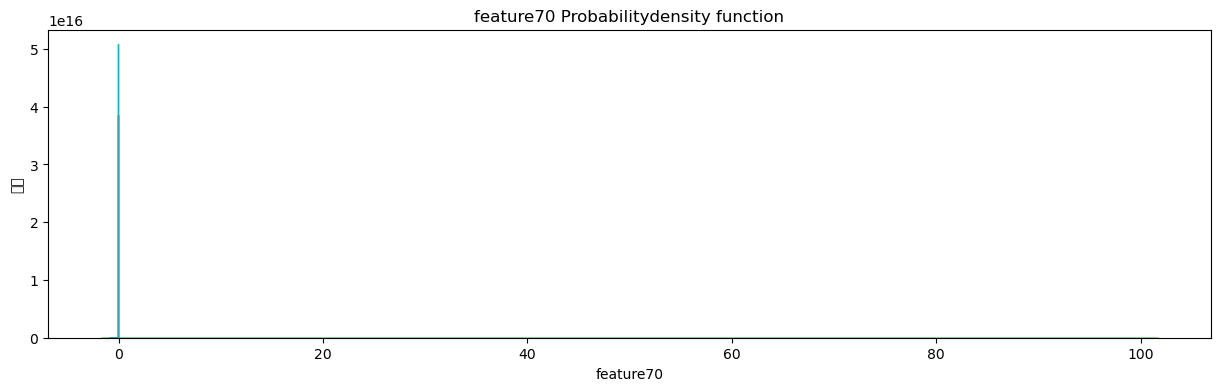

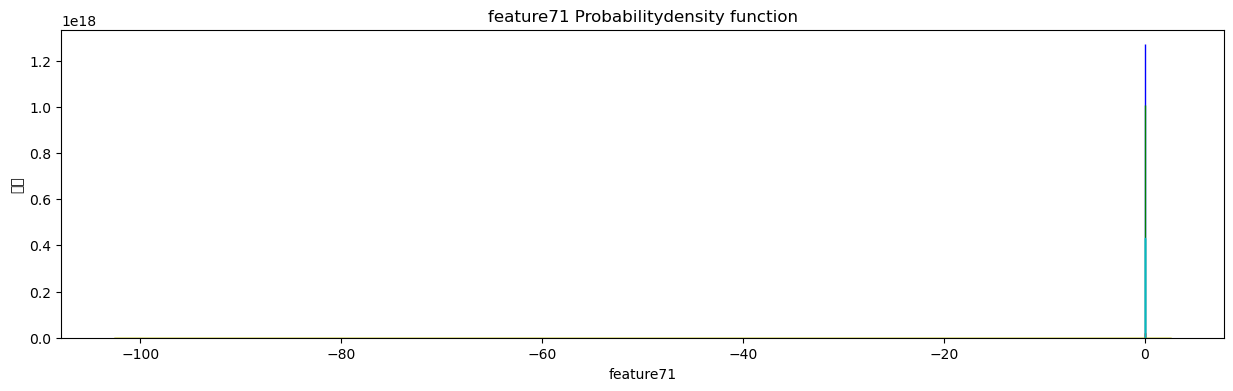

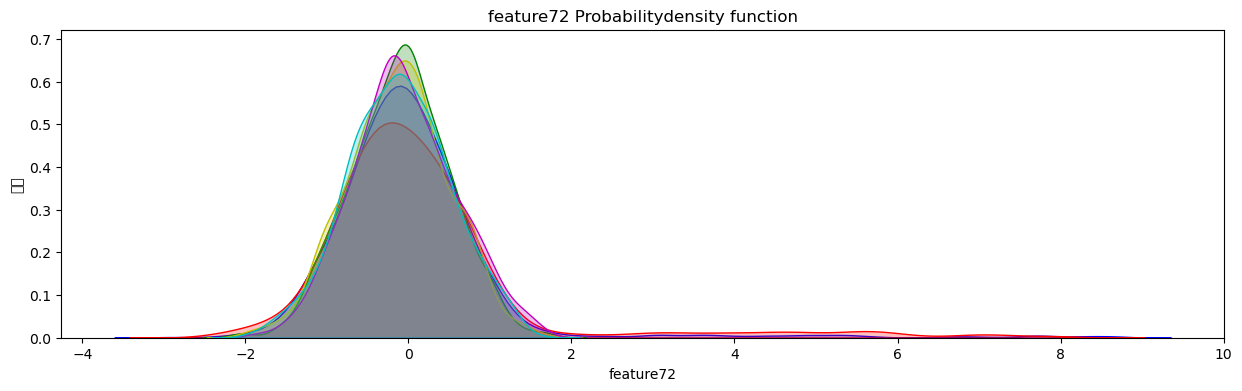

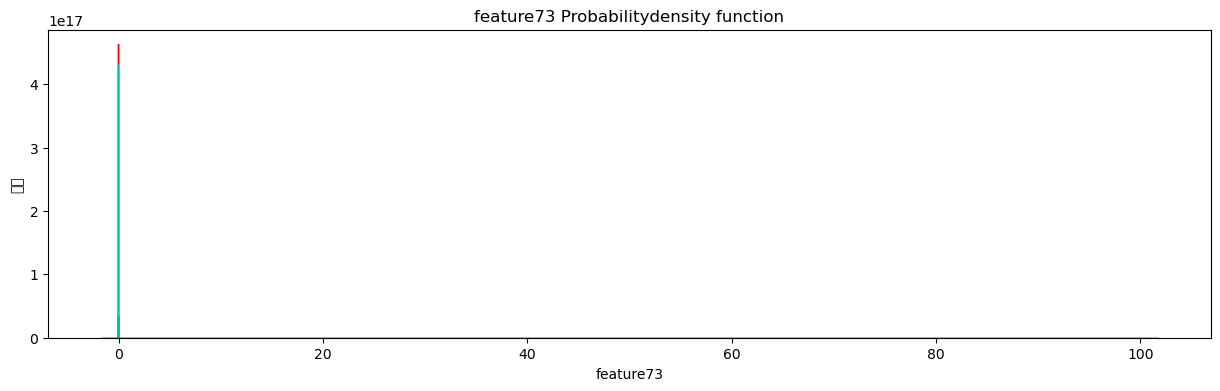

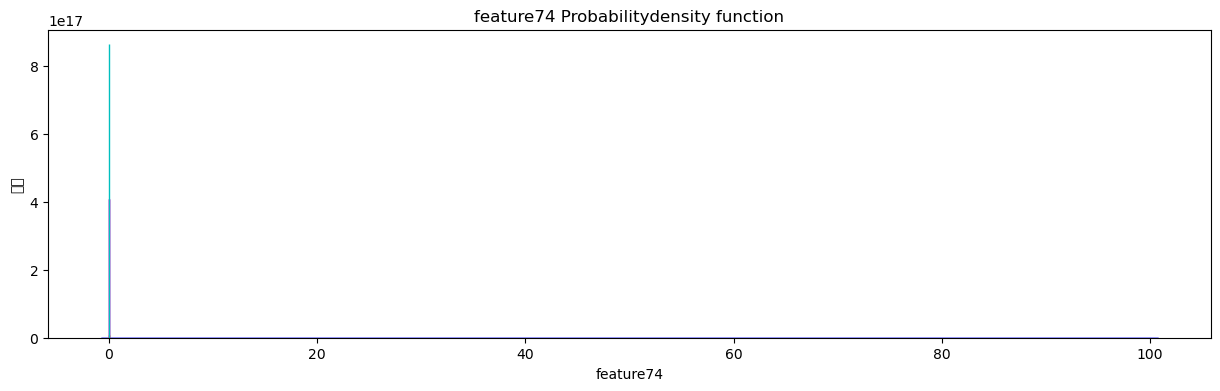

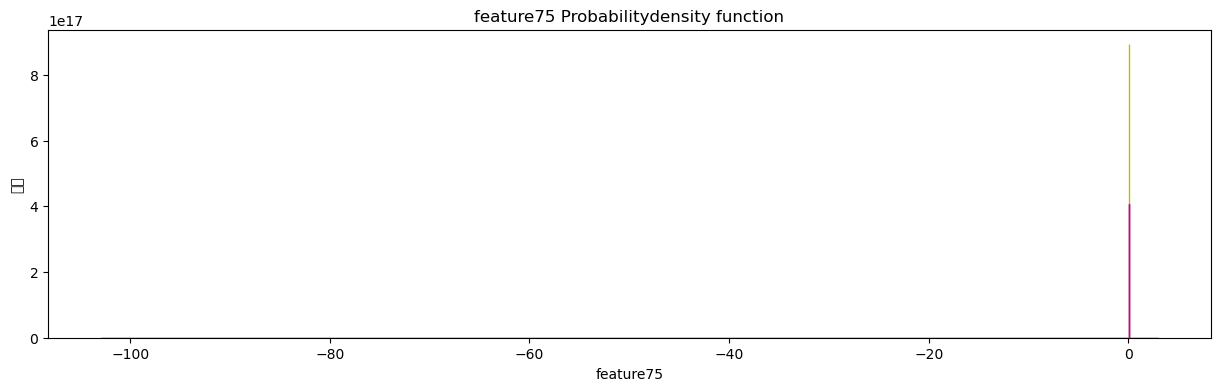

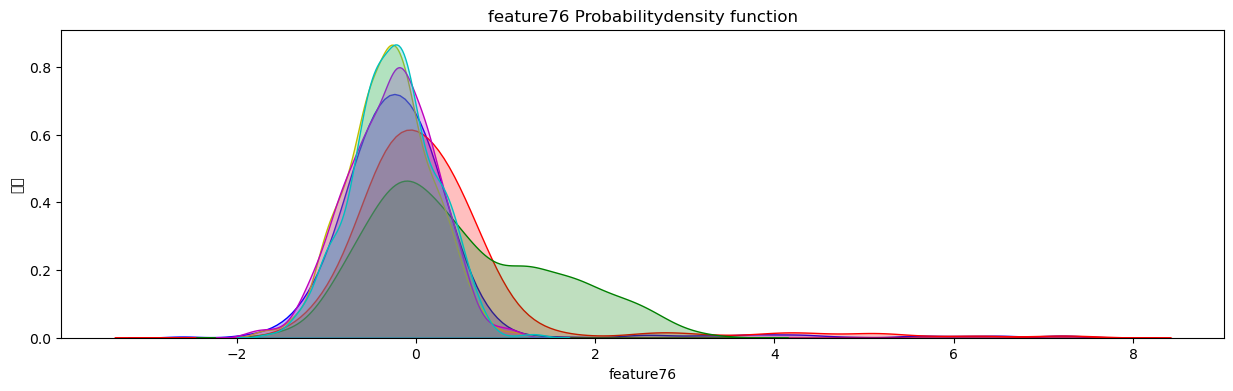

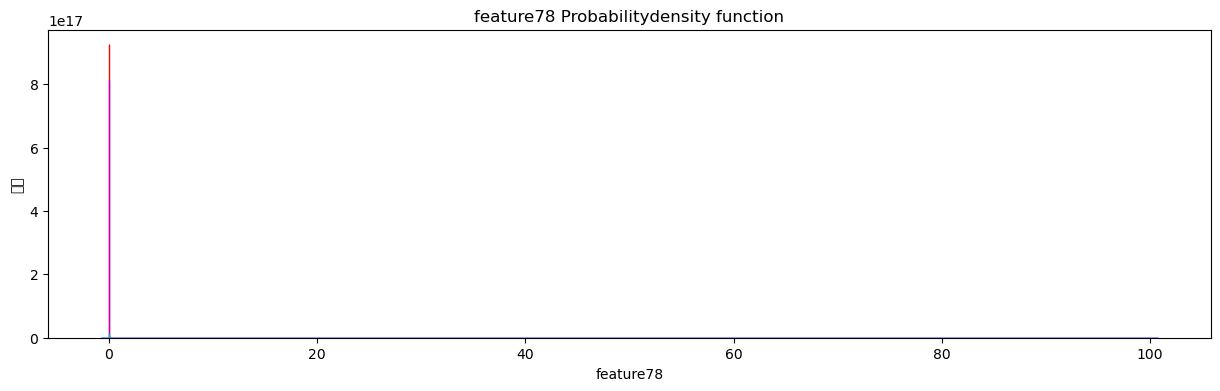

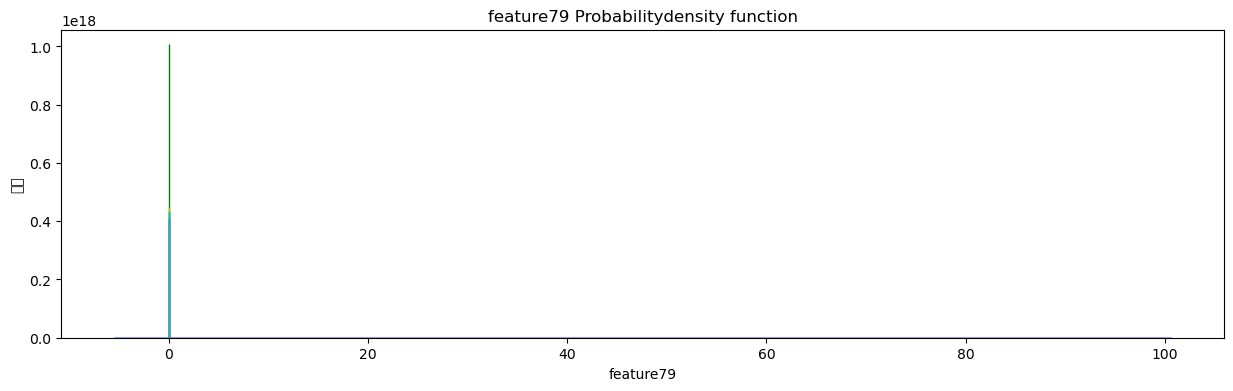

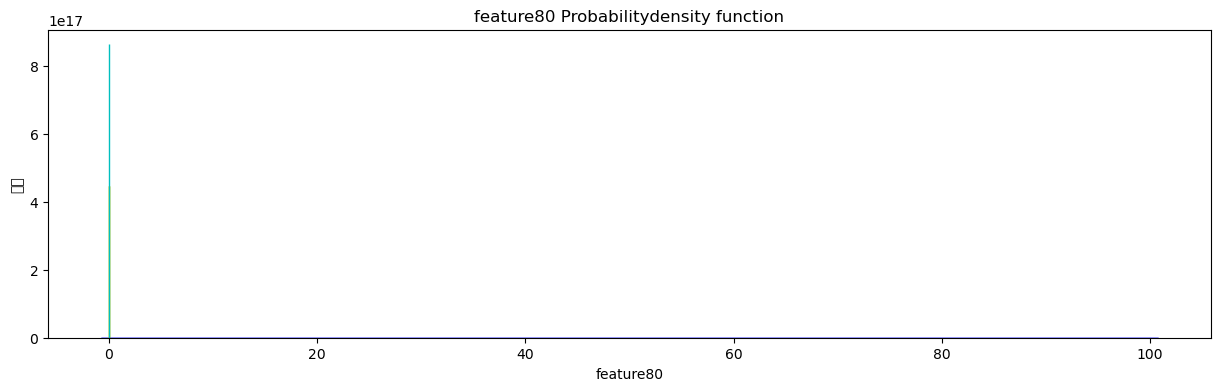

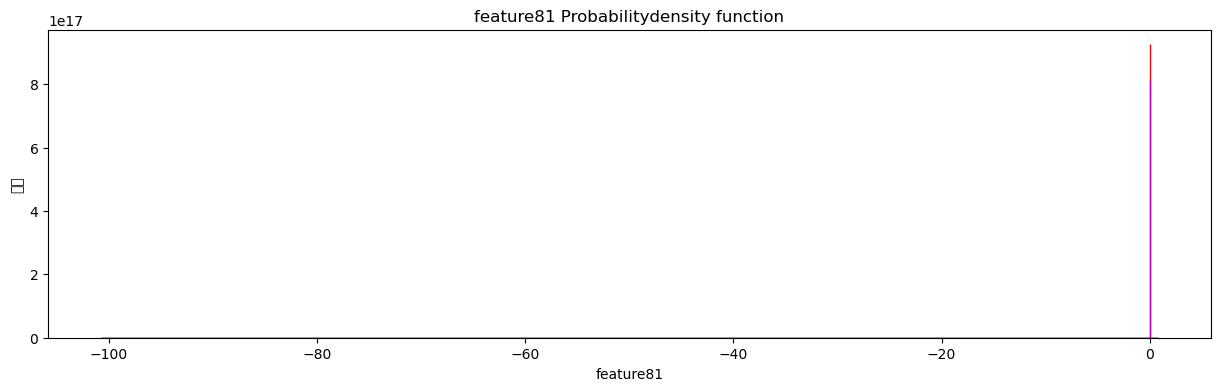

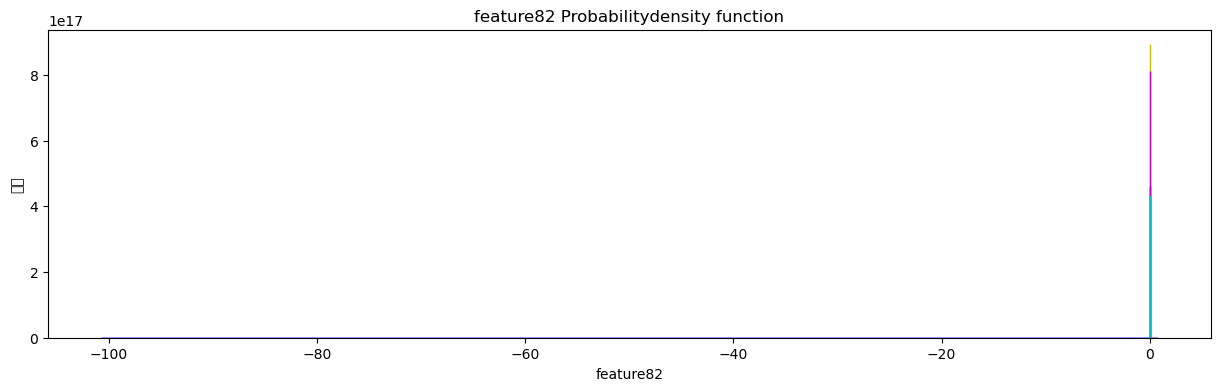

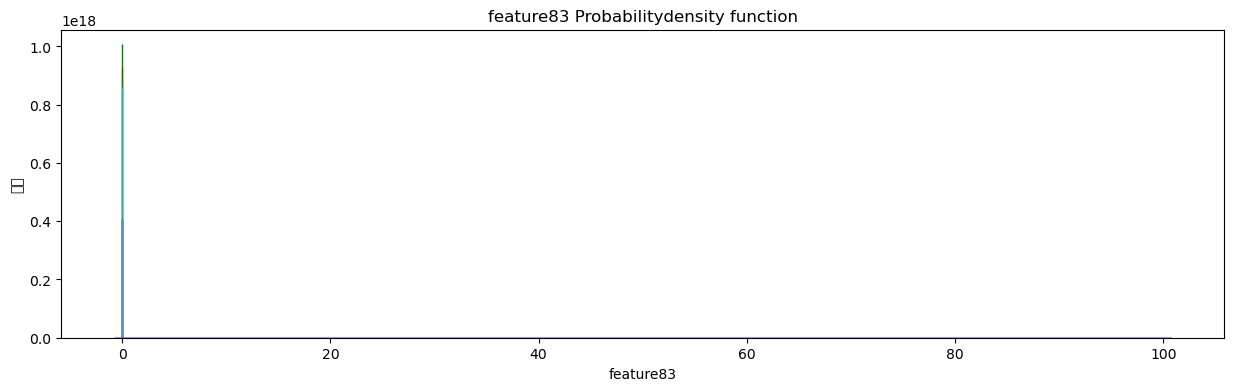

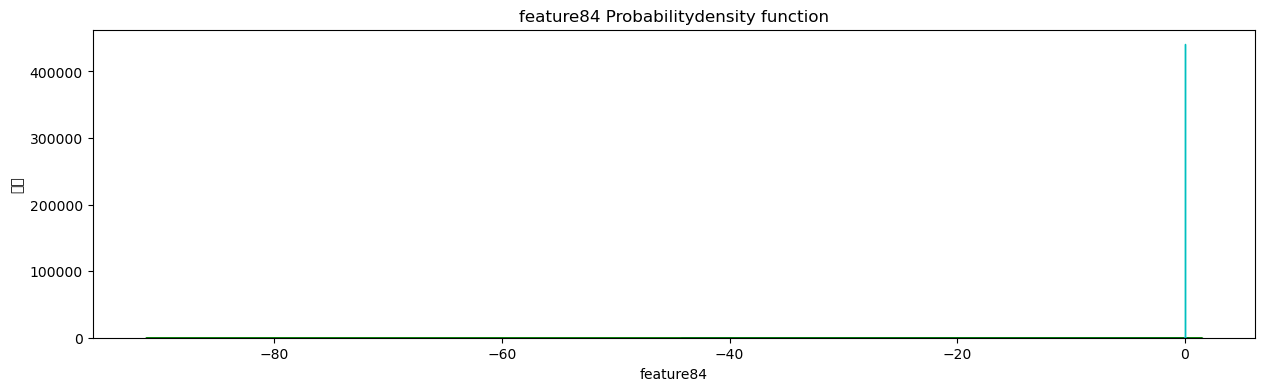

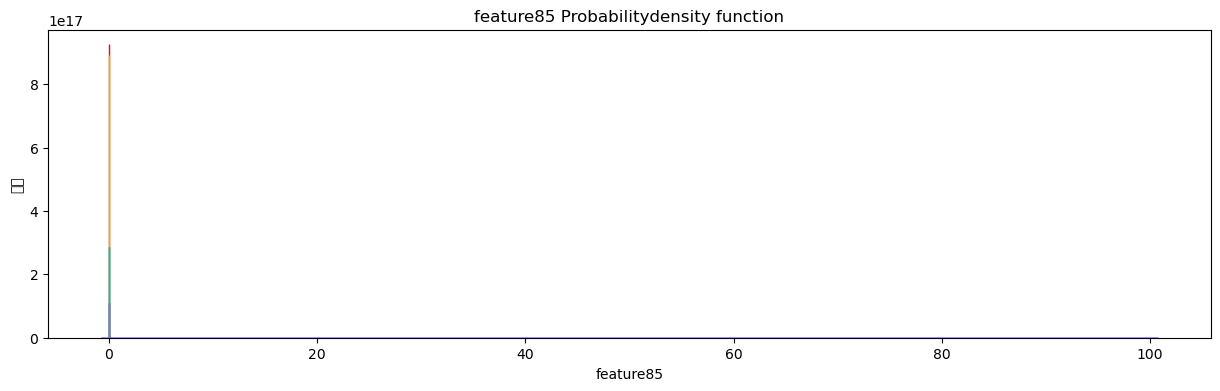

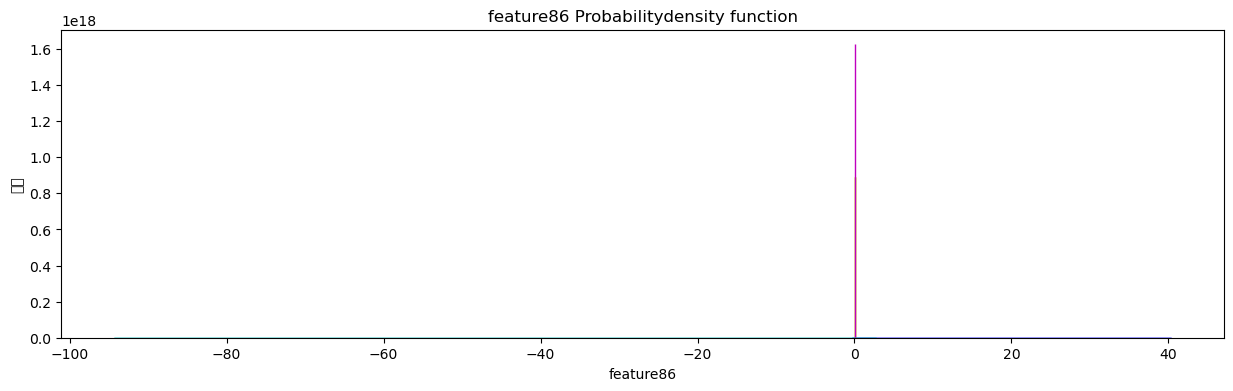

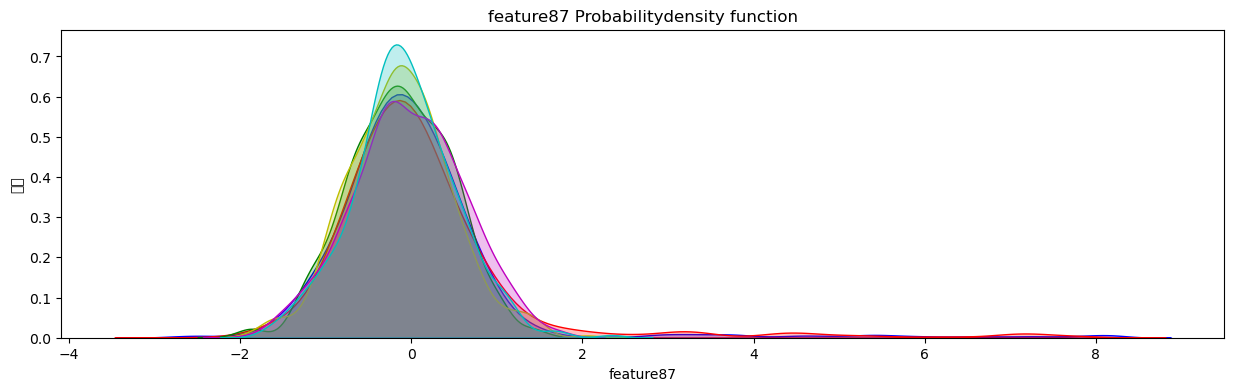

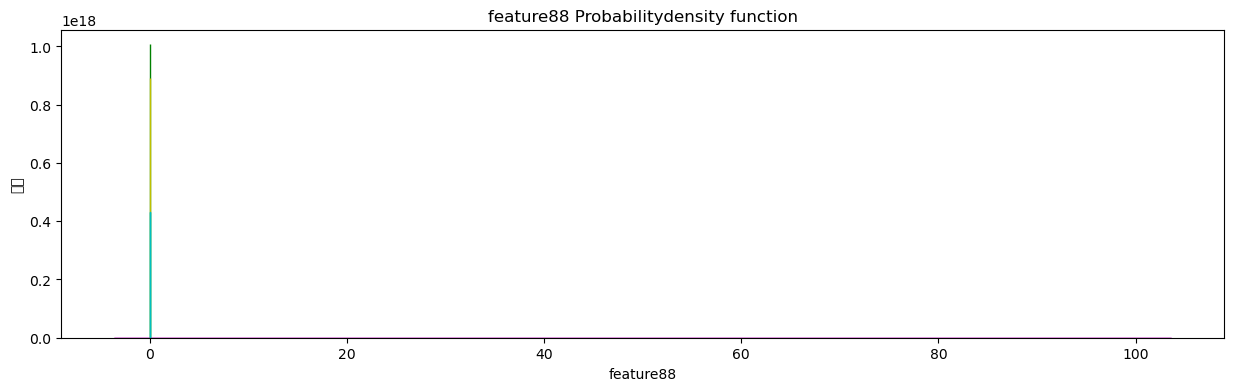

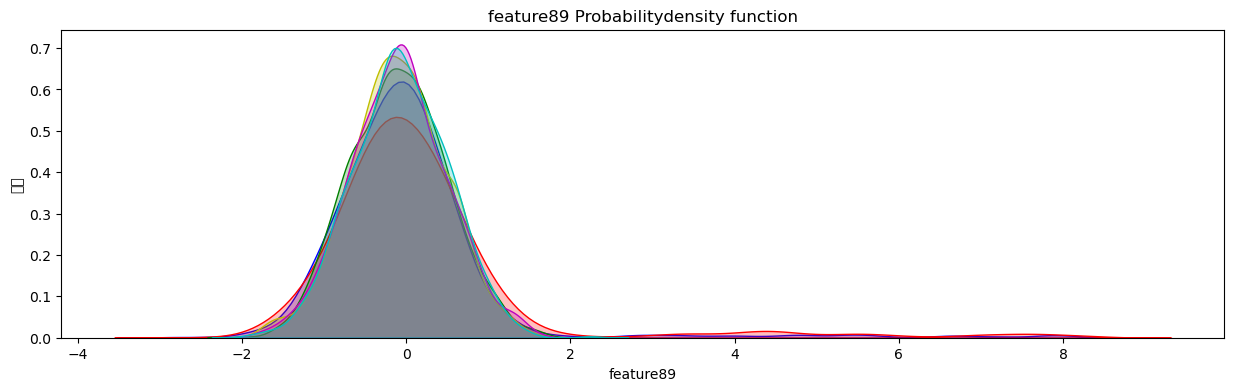

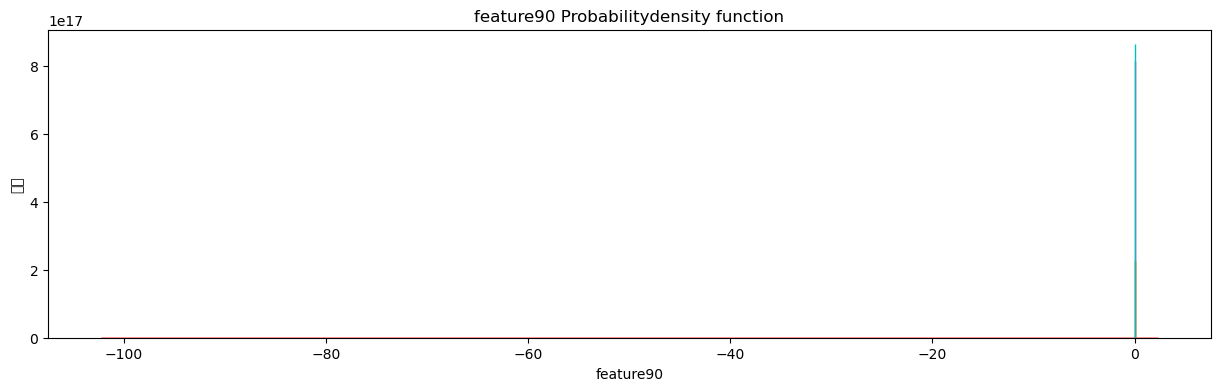

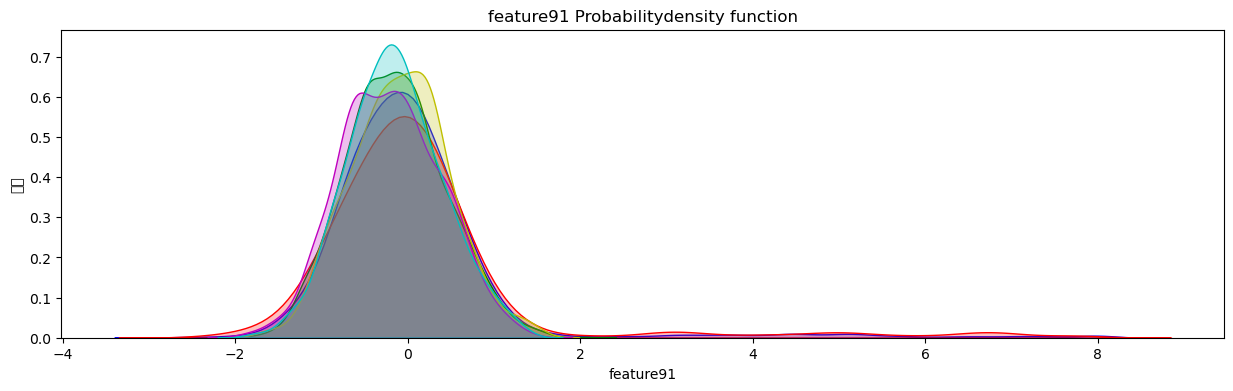

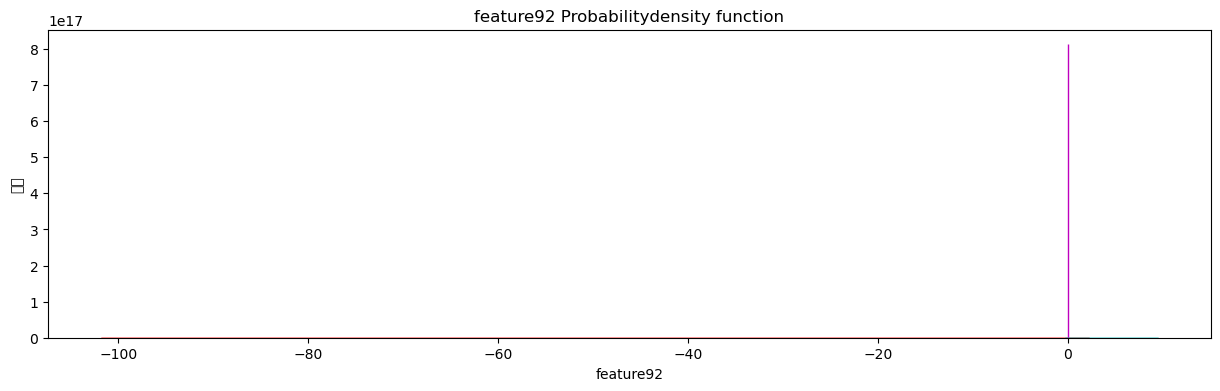

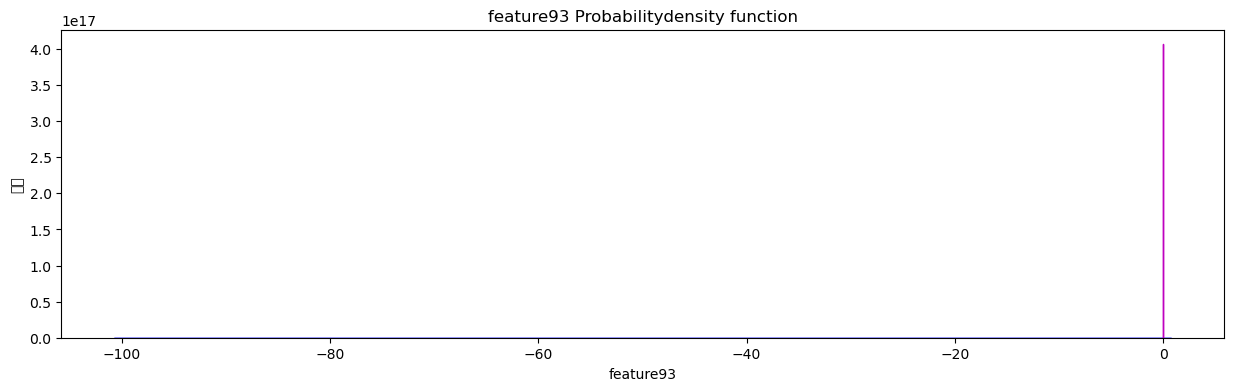

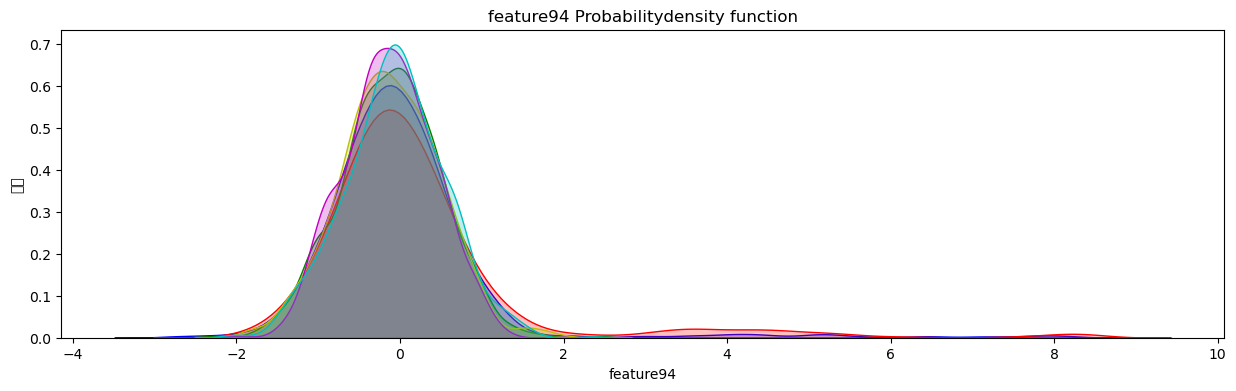

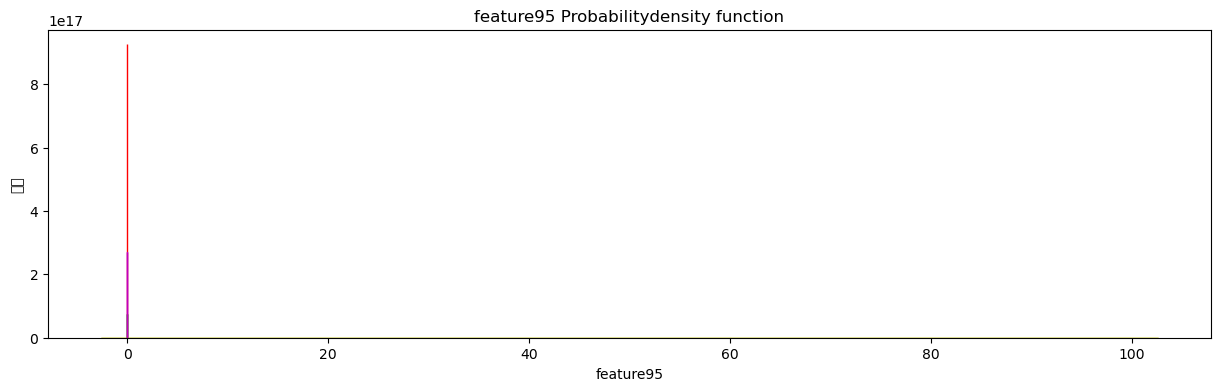

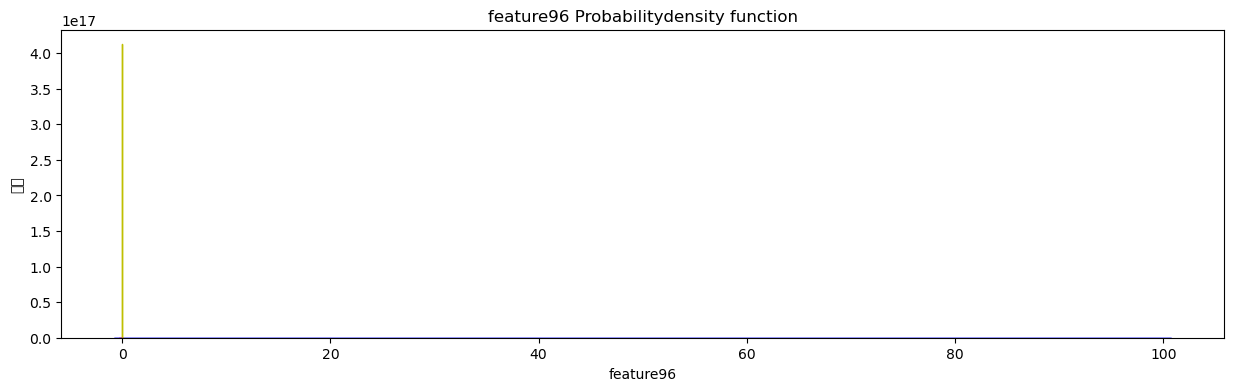

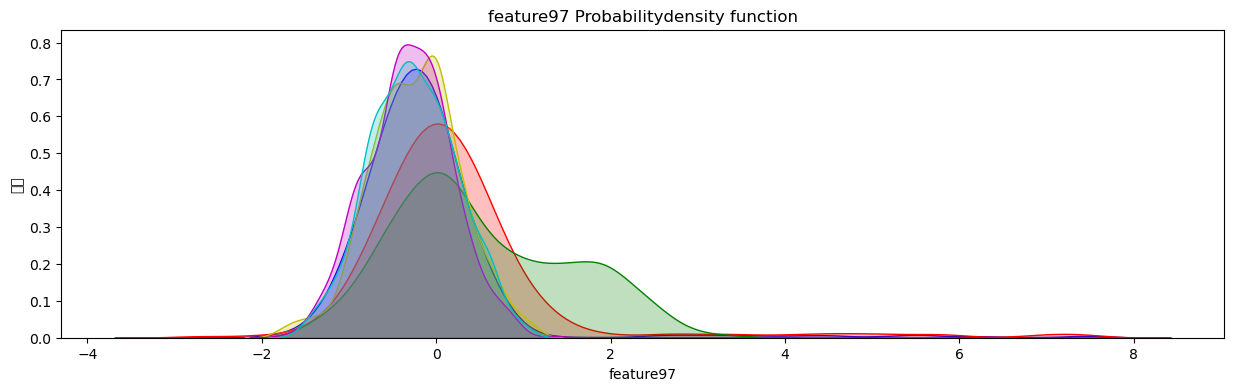

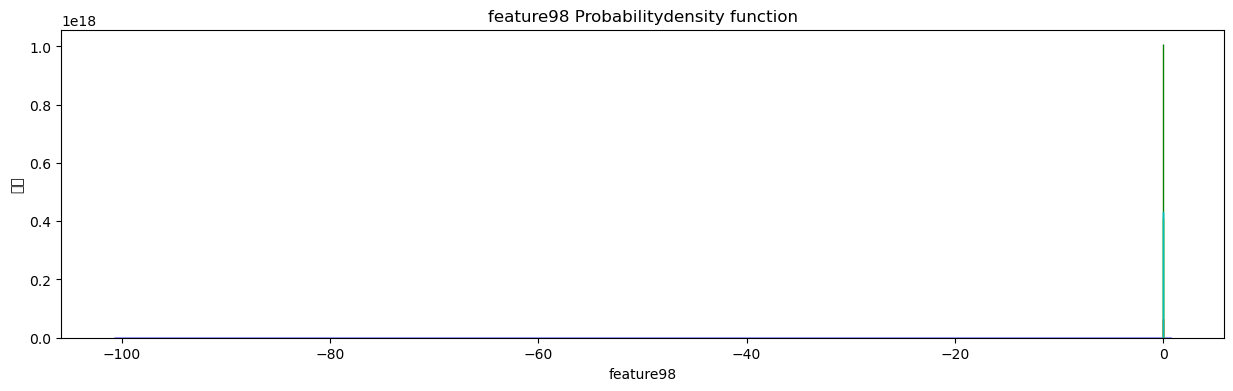

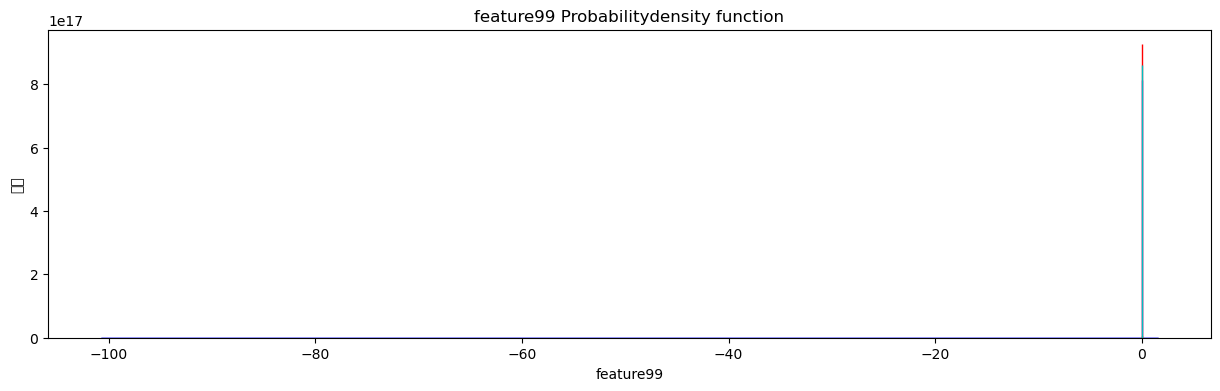

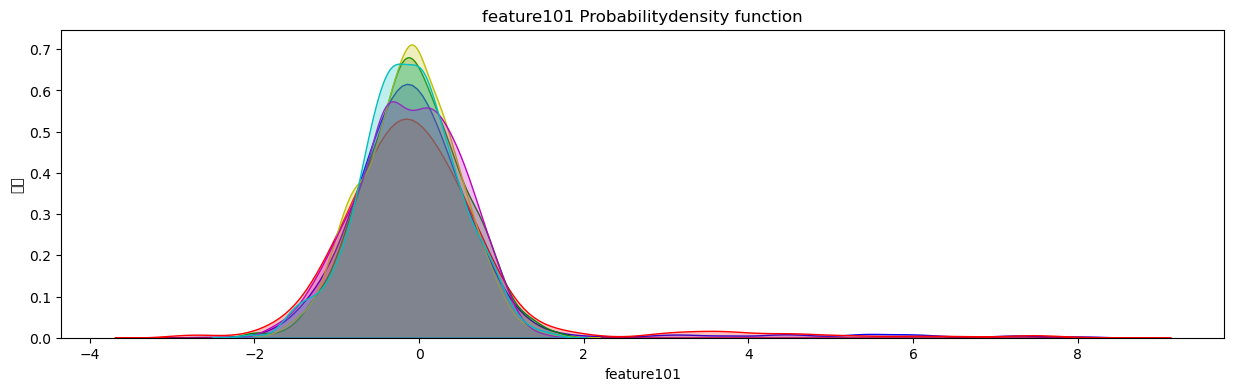

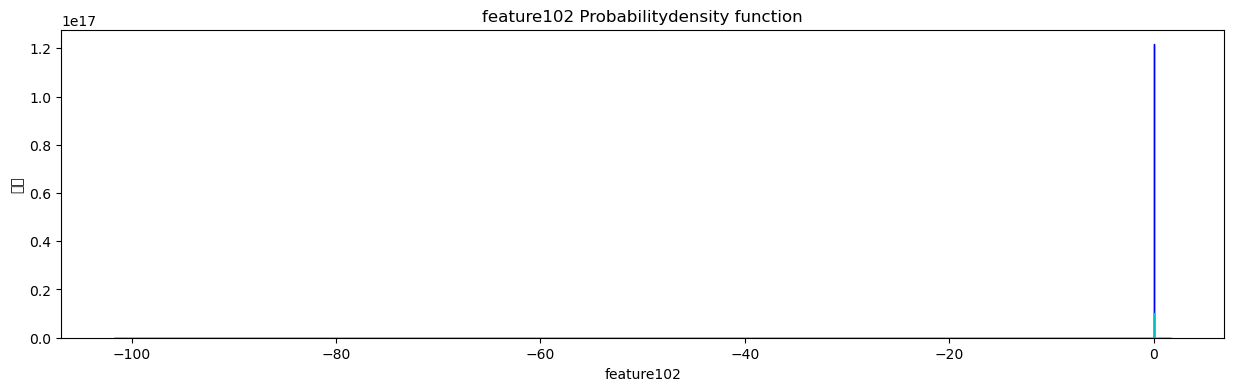

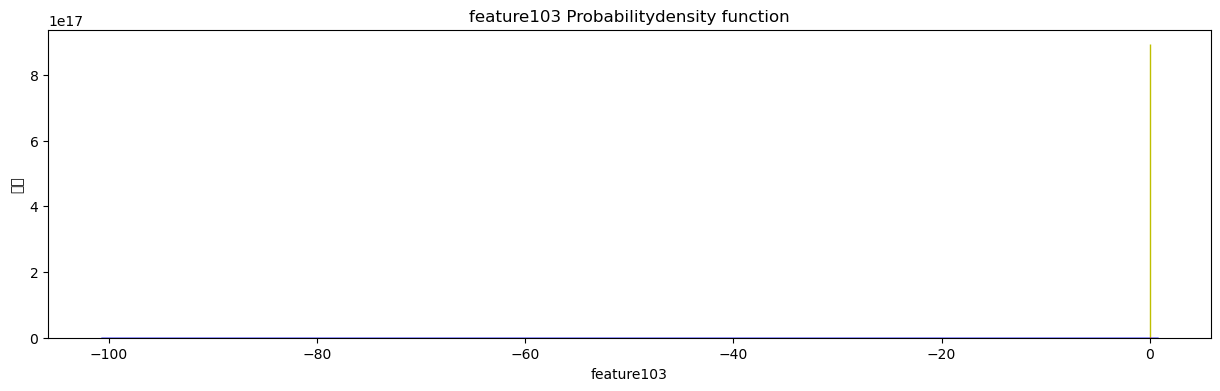

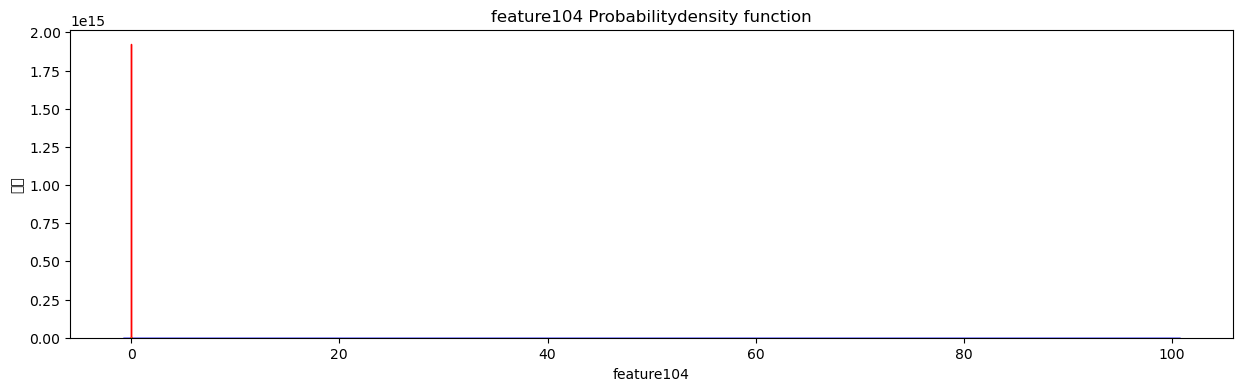

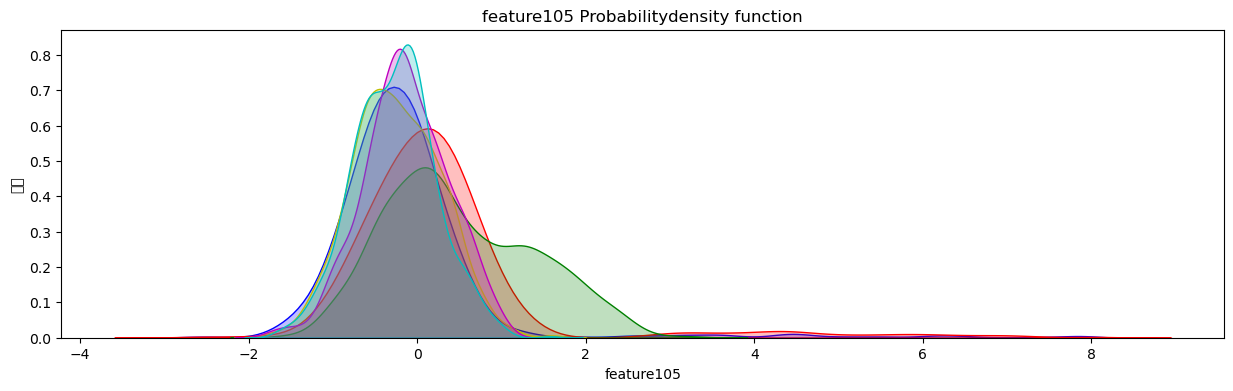

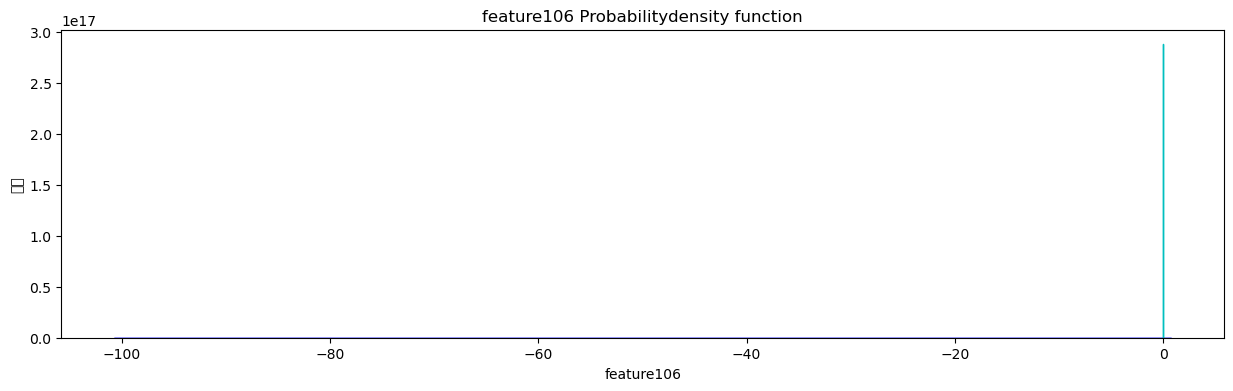

In [26]:

# 各个特征的概率密度函数
feature_names = features.columns.values.tolist()
for name in feature_names:
    fig = plt.figure(figsize=(15, 4), )
    ax = sns.kdeplot(train_data.loc[(train_data['label'] == 0), name], color='b', shade=True, label='0')
    ax = sns.kdeplot(train_data.loc[(train_data['label'] == 1), name], color='r', shade=True, label='1')
    ax = sns.kdeplot(train_data.loc[(train_data['label'] == 2), name], color='g', shade=True, label='2')
    ax = sns.kdeplot(train_data.loc[(train_data['label'] == 3), name], color='y', shade=True, label='3')
    ax = sns.kdeplot(train_data.loc[(train_data['label'] == 4), name], color='m', shade=True, label='4')
    ax = sns.kdeplot(train_data.loc[(train_data['label'] == 5), name], color='c', shade=True, label='5')
    ax.set(xlabel=name, ylabel='频率')
    plt.title('{} Probabilitydensity function'.format(name))
    plt.savefig('../pics/{}的概率密度函数图.png'.format(name))